---

# Predicción de Demanda de Efectivo en Cajeros Automáticos

<div style="text-align: center;">
    <img src="CIMA.jpg" alt="Logo" width="300">
</div>

## Introducción

El manejo eficiente del efectivo en cajeros automáticos (ATMs) es crucial para garantizar la disponibilidad del servicio y minimizar los costos operativos. Un abastecimiento inadecuado puede resultar en faltantes de efectivo, afectando la satisfacción del cliente y la reputación de la institución financiera. Por otro lado, un abastecimiento excesivo implica costos adicionales en logística y seguridad.

Este proyecto se enfoca en predecir la demanda futura de efectivo en ATMs utilizando técnicas avanzadas de aprendizaje automático y reconciliación de pronósticos jerárquicos. El objetivo es optimizar la logística de abastecimiento, reduciendo costos operativos y mejorando la disponibilidad de efectivo para los usuarios.

---

## Descripción del Dataset

El dataset multivariado utilizado en este proyecto contiene registros históricos de transacciones de cajeros automáticos. Las variables clave capturan el comportamiento de la demanda de efectivo y factores que pueden influir en ella.

### Variables Principales

- **fecha_transaccion**: Fecha en la que se realizó la transacción. Es esencial para identificar patrones temporales y estacionales en la demanda.
- **codigo_cajero**: Identificador único del cajero automático (ATM). Permite diferenciar entre distintos puntos de operación.
- **tipo_cajero**: Indica el tipo de cajero, categorizado como 'A' o 'B'. Esta variable puede influir en la demanda según la ubicación, características demográficas o uso específico del cajero.
- **saldo_inicial**: Monto de efectivo disponible al inicio del día. Proporciona contexto sobre el nivel de efectivo previo a las transacciones.
- **demanda**: Cantidad de efectivo retirado por los usuarios. Es la variable objetivo que se busca predecir, ya que representa la demanda real de los clientes.
- **abastecimiento**: Monto de efectivo agregado al cajero para reabastecerlo. Es un factor crítico para mantener niveles adecuados de efectivo y evitar faltantes.
- **saldo_final**: Cantidad de efectivo restante al final del día, después de considerar la demanda y el abastecimiento.

---

## Desafío del Proyecto

El reto consiste en desarrollar un modelo predictivo que estime con precisión la demanda diaria de efectivo en cada cajero automático. La predicción debe considerar factores temporales, estacionales y comportamentales que afectan la demanda. Además, se busca implementar una reconciliación jerárquica de pronósticos para asegurar coherencia entre diferentes niveles de agregación (por ejemplo, grupos de cajeros, clústeres y el total general).

---

## Metodología

### Preprocesamiento de Datos

1. **Análisis Exploratorio de Datos (EDA)**: Se realizó un EDA para entender la distribución de las variables, identificar patrones estacionales y detectar valores atípicos o datos faltantes.
2. **Tratamiento de Datos Faltantes**: Se aplicaron técnicas de imputación, como KNN, para rellenar valores faltantes en las variables relevantes.
3. **Generación de Características (Feature Engineering)**:
   - **Variables Temporales**: Se extrajeron variables como el día de la semana, mes, si es fin de semana o día festivo, y componentes cíclicos (senos y cosenos) para capturar estacionalidades.
   - **Lags y Ventanas Móviles**: Se crearon variables de retraso (lags) y medias móviles para capturar dependencias temporales en la demanda.
   - **Agrupación de Cajeros**: Se agruparon los cajeros en clústeres utilizando técnicas de clustering (por ejemplo, K-means) basadas en características similares de demanda y comportamiento.

### Modelado Predictivo

Se probaron varios modelos de aprendizaje automático para predecir la demanda de efectivo:

- **LightGBM**: Un modelo de gradient boosting eficiente que maneja grandes conjuntos de datos y captura relaciones no lineales.
  - **Optimización de Hiperparámetros**: Se realizó una búsqueda en malla (grid search) para encontrar los mejores hiperparámetros.
- **AdaBoost**: Un algoritmo de boosting que combina múltiples modelos débiles para formar un modelo fuerte.
  - **Ventajas**: Es robusto a sobreajuste y puede mejorar el rendimiento en conjuntos de datos con ruido.
- **Ensamble de Modelos**: Se promediaron las predicciones de LightGBM y AdaBoost para crear un modelo de ensamble que aprovecha las fortalezas de ambos.
  - **Justificación**: Los ensambles suelen mejorar la precisión y robustez de las predicciones al combinar diferentes modelos.

### Reconciliación de Pronósticos Jerárquicos

#### Motivación

En sistemas con estructuras jerárquicas, como múltiples cajeros agrupados en clústeres y grupos, es esencial que las predicciones a niveles inferiores sumen coherentemente a las predicciones en niveles superiores. Esto asegura consistencia en las decisiones operativas y evita discrepancias en la planificación.

#### Método MinT (Minimum Trace)

Se implementó el método MinT (Minimum Trace) para reconciliar los pronósticos en la jerarquía. MinT es una técnica estadística que ajusta las predicciones en diferentes niveles para minimizar el error total, garantizando coherencia entre ellos.

**Pasos Clave:**

1. **Construcción de la Matriz de Diseño (S)**: Representa las relaciones de agregación entre los diferentes niveles de la jerarquía (Total, Grupo, Clúster, Cajero).
2. **Cálculo de la Matriz de Covarianza de Errores**: Se estimó la covarianza de los errores de pronóstico en el nivel más bajo (cajeros individuales) utilizando los errores históricos.
3. **Aplicación del Método MinT**: Se ajustaron las predicciones base mediante una fórmula que minimiza la traza de la matriz de covarianza de los errores reconciliados, asegurando que las predicciones en niveles inferiores sumen a las de niveles superiores.

**Ventajas del MinT:**

- **Coherencia**: Garantiza que las predicciones agregadas en niveles inferiores coincidan con las predicciones en niveles superiores.
- **Eficiencia Estadística**: Minimiza el error global de las predicciones reconciliadas.
- **Flexibilidad**: Puede aplicarse a jerarquías de cualquier profundidad y estructura.

---

## Resultados

### Evaluación de Modelos

- **Métricas Utilizadas**: RMSE (Root Mean Squared Error) y MAPE (Mean Absolute Percentage Error).
- **Desempeño**: El modelo de ensamble superó a los modelos individuales, proporcionando predicciones más precisas y estables.

### Impacto de la Reconciliación

- **Consistencia**: Las predicciones reconciliadas mostraron coherencia entre todos los niveles de la jerarquía.
- **Mejora en la Planificación**: Al tener pronósticos consistentes, se facilita la toma de decisiones en logística y abastecimiento.

---

## Conclusiones

La implementación de modelos de aprendizaje automático avanzados, combinados con técnicas de reconciliación jerárquica como el método MinT, permite predecir de manera precisa y consistente la demanda de efectivo en cajeros automáticos. Esto tiene un impacto directo en la optimización de la logística de abastecimiento, reducción de costos operativos y mejora en la satisfacción del cliente.

### Próximos Pasos:

1. **Incorporar Variables Externas**: Considerar factores macroeconómicos o eventos especiales que puedan influir en la demanda.
2. **Implementación en Tiempo Real**: Desplegar el modelo en un entorno productivo para predicciones en tiempo real.
3. **Monitoreo y Retroalimentación**: Establecer un sistema de monitoreo continuo para ajustar el modelo según nuevos datos y cambios en el comportamiento de los usuarios.

---

## Autor
Andre Saul Juarez Castro - [LinkedIn](https://www.linkedin.com/in/andre-juarez-castro/)   
  
Jairo Gonzalo Rojas Melgarejo- [LinkedIn](https://www.linkedin.com/in/jairo-gonzalo-rojas-melgarejo-248166239/)   

---


---

# **Paquetes Utilizados en este Proyecto**

En este proyecto, se hace uso de una combinación de paquetes externos descargables y módulos creados específicamente para modularizar el código. A continuación, se presenta una descripción de ambos.

---

## **Paquetes Externos**
Estos paquetes deben descargarse e instalarse antes de ejecutar el proyecto. Se utilizan para realizar análisis, visualización de datos, preprocesamiento, y modelado predictivo.

### **Paquetes de Manipulación y Análisis de Datos**
- `pandas`: Para la manipulación y análisis de datos en estructuras de DataFrame.
- `numpy`: Para realizar cálculos numéricos eficientes y manejo de matrices.

### **Paquetes de Visualización**
- `matplotlib`: Para crear gráficos estáticos y visualizaciones personalizadas.
- `seaborn`: Para visualizaciones estadísticas y gráficos avanzados basados en Matplotlib.

### **Paquetes para Modelado Predictivo**
- `lightgbm`: Biblioteca para construir modelos predictivos basados en algoritmos de boosting.
- `xgboost`: Otro paquete para boosting, útil en tareas de regresión y clasificación.
- `scikit-learn`: Conjunto de herramientas para preprocesamiento, modelos predictivos y evaluación.
  - `RandomForestRegressor`: Modelo basado en árboles de decisión.
  - `LinearRegression`: Regresión lineal simple.
  - `RandomizedSearchCV`: Búsqueda aleatoria para optimización de hiperparámetros.
  - `StandardScaler`: Para la normalización de características.

### **Paquetes de Series de Tiempo**
- `tslearn`: Para análisis y clustering de series de tiempo, incluye métricas como DTW.
- `statsmodels`: Modelos estadísticos y de series de tiempo como ETS y ARIMA.

### **Otros Paquetes Útiles**
- `joblib`: Para serializar y guardar modelos en disco.
- `skimpy`: Para realizar resúmenes rápidos de los datos.
- `scipy`: Contiene herramientas estadísticas, como `uniform` y `randint` para búsqueda de hiperparámetros.
- `collections`: Para estructuras de datos avanzadas como `defaultdict`.
- `warnings`: Para suprimir o gestionar mensajes de advertencia.

---



## **Preparación**
Antes de comenzar, asegúrate de instalar los paquetes externos ejecutando el siguiente comando:


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For time series clustering and DTW
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# For linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from skimpy import skim, generate_test_data
import seaborn as sns
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
from collections import deque
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pandas.tseries.offsets import DateOffset
import joblib
from collections import defaultdict
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from pandas.tseries.offsets import DateOffset
import lightgbm as lgb
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor
import joblib
import matplotlib.pyplot as plt



In [2]:
pip install -r requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tslearn-0.6.3-py3-none-any.whl.metadata (14 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached skimpy-0.0.15-py3-none-any.whl.metadata (28 kB)
  Using cached plotly-5.24.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached setuptools-75.3.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  U

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

# **Modularización del Proyecto**

En este proyecto, el código ha sido modularizado para facilitar su mantenimiento, escalabilidad y reutilización. La modularización consiste en dividir las funcionalidades principales en diferentes archivos `.py`, donde cada archivo representa un módulo especializado. Estos módulos son luego importados y utilizados en el cuaderno Jupyter (`.ipynb`) para realizar el análisis y generar resultados.

---

## **Descripción de los Módulos**

### **`cluster.py`**
- Este módulo contiene funciones relacionadas con el agrupamiento de cajeros automáticos (ATMs) mediante técnicas de **clustering**.
- Incluye la lógica para realizar agrupaciones basadas en características de transacciones, demanda y comportamientos similares.
- **Técnicas utilizadas**: K-means, análisis de características, y visualización de grupos.

---

### **`graficos.py`**
- Encargado de generar visualizaciones para el análisis exploratorio de datos y la presentación de resultados.
- Incluye funciones para gráficos de tendencias, distribuciones, series de tiempo y comparaciones entre predicciones y valores reales.
- **Librerías utilizadas**: Matplotlib, Seaborn.

---

### **`modelito.py`**
- Este módulo encapsula las funciones relacionadas con el **modelado predictivo**.
- Contiene la lógica para entrenar modelos como **LightGBM**, **AdaBoost** y ensamblar predicciones.
- También incluye la optimización de hiperparámetros y métricas de evaluación como **RMSE** y **MAPE**.

---

### **`process.py`**
- Responsable del **preprocesamiento de datos**, incluyendo:
  - Tratamiento de datos faltantes utilizando métodos como **KNN**.
  - Generación de características temporales y derivadas (lags, medias móviles, transformaciones cíclicas).
  - Preparación de los datos para alimentar los modelos predictivos.

---

## **Flujo de Trabajo en el Cuaderno Jupyter**

### **Importación de Módulos**
Los módulos creados se importan en el archivo Jupyter utilizando la sintaxis `import module_name` o `from module_name import specific_function`.  
Esto permite centralizar la lógica en archivos externos y mantener el cuaderno organizado.



In [4]:

import process
import importlib
import cluster 
import graficos
importlib.reload(cluster)
importlib.reload(process)
import process as p
import cluster as cl
import graficos as gr
importlib.reload(gr)
import graficos as gr
import modelito as md
import modelito as md
importlib.reload(md)


<module 'modelito' from 'g:\\Mi unidad\\DATAFEST_CONTENIDO\\lastdance_casestudy_Competencia\\modelito.py'>

## 1)  Carga del Dataset

Se carga el archivo `Datafest24_Train_combined.csv` en un DataFrame utilizando la función `read_csv` de `pandas`. El archivo se lee con un separador de punto y coma (`;`), y el DataFrame resultante se almacena en la variable `df`. A continuación, se muestra el contenido del DataFrame cargado.


In [5]:
df = pd.read_csv("Datafest24_Train_combined.csv",sep = ';')
df

fecha_transaccion  codigo_cajero tipo_cajero  saldo_inicial  demanda  \
0             02/06/2023              6           B         644690   243020   
1             03/06/2023              6           B         401670   364110   
2             04/06/2023              6           B          37560    -5850   
3             05/06/2023              6           B          43410    25550   
4             06/06/2023              6           B         456560    45820   
...                  ...            ...         ...            ...      ...   
247795        15/04/2024            685           A          72960      340   
247796        15/04/2024            690           A         200000   185560   
247797        15/04/2024            692           A          43570     1760   
247798        15/04/2024            695           A           7900    24980   
247799        15/04/2024            698           A          40170     1010   

        abastecimiento  saldo_final  
0                    0       401670  
1                    0        37560  
2                    0        43410  
3               438700       456560  
4                    0       410740  
...                ...          ...  
247795          361040       433660  
247796          476550       490990  
247797          475260       517070  
247798          468900       451820  
247799          375680       414840  

[247800 rows x 7 columns]

## 2) Preprocesamiento y Optimización de Tipos de Datos

1. **Renombrar Columnas**: Se renombraron algunas columnas del DataFrame original `df` para mejorar su legibilidad y coherencia:
   - `fecha_transaccion` a `transactionTime`
   - `codigo_cajero` a `atmId`
   - `demanda` a `balance_change`

2. **Preprocesamiento de Datos**: Se aplicó la función `preprocess_atm_data` de un módulo `p` para procesar y transformar el DataFrame `df`. Luego, se cargó el DataFrame preprocesado desde un archivo CSV llamado `df_preprocessed_final.csv`.

3. **Eliminación de Columna No Necesaria**: Se eliminó la columna `Unnamed: 0` del DataFrame para liberar memoria, ya que no contiene información útil.

4. **Optimización de Tipos de Datos**: Se creó una función llamada `optimize_data_types` que recorre las columnas del DataFrame y convierte los tipos de datos de las columnas:
   - De `float64` a `float32` para reducir el uso de memoria.
   - De `int64` a `int32` para optimizar el espacio ocupado.

El DataFrame final preprocesado y optimizado se almacena en la variable `df_preprocessed`.


In [6]:
df = df.rename(columns={'fecha_transaccion':'transactionTime','codigo_cajero':'atmId','demanda':'balance_change'})

In [7]:
df_proc = p.preprocess_atm_data(df)

In [8]:
df_proc=pd.read_csv("df_preprocessed_final.csv")
df_proc=df_proc.drop(["Unnamed: 0"], axis=1)

In [9]:
# Para poder salvar memoria
def optimize_data_types(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].astype('float32')
        elif df[col].dtype == 'int64':
            df[col] = df[col].astype('int32')
    return df

df_preprocessed = optimize_data_types(df_proc)
df_preprocessed

transactionTime  atmId tipo_cajero  saldo_inicial  balance_change  \
0           2023-06-02      1           B       647830.0    384630.00000   
1           2023-06-03      1           B       263200.0    251860.00000   
2           2023-06-04      1           B        11340.0    185076.25000   
3           2023-06-05      1           B        64250.0     24710.00000   
4           2023-06-06      1           B       396870.0     44010.00000   
...                ...    ...         ...            ...             ...   
247795      2024-05-16    700           A       435030.0    435010.00000   
247796      2024-05-17    700           A           20.0     47830.00000   
247797      2024-05-18    700           A       257620.0    172600.96875   
247798      2024-05-19    700           A       317920.0    257470.00000   
247799      2024-05-20    700           A        60450.0     53580.00000   

        day_of_week  month  is_weekend  day  week   day_sin   day_cos  \
0                 4      6           0    2     1 -0.433884 -0.900969   
1                 5      6           1    3     1 -0.974928 -0.222521   
2                 6      6           1    4     1 -0.781832  0.623490   
3                 0      6           0    5     1  0.000000  1.000000   
4                 1      6           0    6     1  0.781832  0.623490   
...             ...    ...         ...  ...   ...       ...       ...   
247795            3      5           0   16     3  0.433884 -0.900969   
247796            4      5           0   17     3 -0.433884 -0.900969   
247797            5      5           1   18     3 -0.974928 -0.222521   
247798            6      5           1   19     3 -0.781832  0.623490   
247799            0      5           0   20     3  0.000000  1.000000   

        week_sin      week_cos  is_replenishment  balance_change_lag24  \
0            1.0  6.123234e-17                 0                   NaN   
1            1.0  6.123234e-17                 0                   NaN   
2            1.0  6.123234e-17                 0                   NaN   
3            1.0  6.123234e-17                 1                   NaN   
4            1.0  6.123234e-17                 0                   NaN   
...          ...           ...               ...                   ...   
247795      -1.0 -1.836970e-16                 0              205870.0   
247796      -1.0 -1.836970e-16                 1               14610.0   
247797      -1.0 -1.836970e-16                 0              338730.0   
247798      -1.0 -1.836970e-16                 0               99170.0   
247799      -1.0 -1.836970e-16                 1              210760.0   

        rolling_mean_24h  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
247795     171689.171875  
247796     173073.328125  
247797     156447.078125  
247798     163042.921875  
247799     156493.750000  

[247800 rows x 17 columns]

In [1]:
import numpy as np
import scipy.stats as stats

# Función para aplicar la transformación Box-Cox
def aplicar_boxcox(df, atm_id):
    # Filtrar los datos para el ATM específico
    atm_data = df[df['atmId'] == atm_id].copy()
    
    # Asegurarse de que todos los valores de 'balance_change' sean positivos para aplicar Box-Cox
    shift = abs(atm_data['balance_change'].min()) + 1
    balance_change = atm_data['balance_change'] + shift
    
    # Aplicar la transformación Box-Cox
    balance_change_boxcox, lam = stats.boxcox(balance_change)
    
    # Guardar la transformación en el DataFrame original
    atm_data['balance_change_boxcox'] = balance_change_boxcox
    
    # Mostrar el valor de lambda
    print(f"Lambda de Box-Cox para el ATM {atm_id}: {lam}")
    
    return atm_data, lam, shift

# Función para destransformar valores de Box-Cox
def destransformar_boxcox(y_boxcox, lam, shift):
    if lam != 0:
        y_original = (y_boxcox * lam + 1)**(1/lam) - shift
    else:
        y_original = np.exp(y_boxcox) - shift
    return y_original



## 3)  Análisis y Agrupación de Cajeros

1. **Filtrado por Tipo de Cajero**: 
   - Se dividió el DataFrame `df_preprocessed` en dos subconjuntos: `df_a` para los cajeros de tipo 'A' y `df_b` para los cajeros de tipo 'B'. Esto permite realizar análisis específicos para cada tipo de cajero.

2. **Extracción de Características Temporales**:
   - Se aplicó la función `extract_time_series_features` para extraer características relacionadas con series temporales de las transacciones de cajeros tipo 'A' (`extracted_features_a`) y tipo 'B' (`extracted_features_b`).

3. **Determinación del Número Óptimo de Clusters**:
   - Se utilizaron dos métodos para determinar el número óptimo de clústeres para los cajeros tipo 'B':
     - **Método Davies-Bouldin**: `determine_optimal_clusters_davies_bouldin` evaluó la calidad de la agrupación.
     - **Método Silhouette**: `determine_optimal_clusters_silhouette` proporcionó una evaluación alternativa para el número óptimo de clústeres.
   - Ambos métodos se probaron con un máximo de 50 clústeres.

4. **Análisis Univariado de Series Temporales**:
   - Se realizaron análisis univariados para estudiar las series temporales de las transacciones de cajeros. Se utilizó la función `analyze_univariate_time_series` para analizar las transacciones de los cajeros tipo 'B', y se filtró específicamente el cajero con `atmId` igual a '306' para examinar su comportamiento en particular.


In [10]:
df_a = df_preprocessed[df_preprocessed['tipo_cajero'] == 'A']
df_b = df_preprocessed[df_preprocessed['tipo_cajero'] == 'B']

In [11]:
extracted_features_a = cl.extract_time_series_features(df_a)
extracted_features_b = cl.extract_time_series_features(df_b)

Feature Extraction: 100%|██████████| 10/10 [00:41<00:00,  4.11s/it]


In [ ]:
#Determinar el numero exacto  de clusters
cl.determine_optimal_clusters_davies_bouldin(extracted_features_b, max_k=50)
cl.determine_optimal_clusters_silhouette(extracted_features_b, max_k=50)


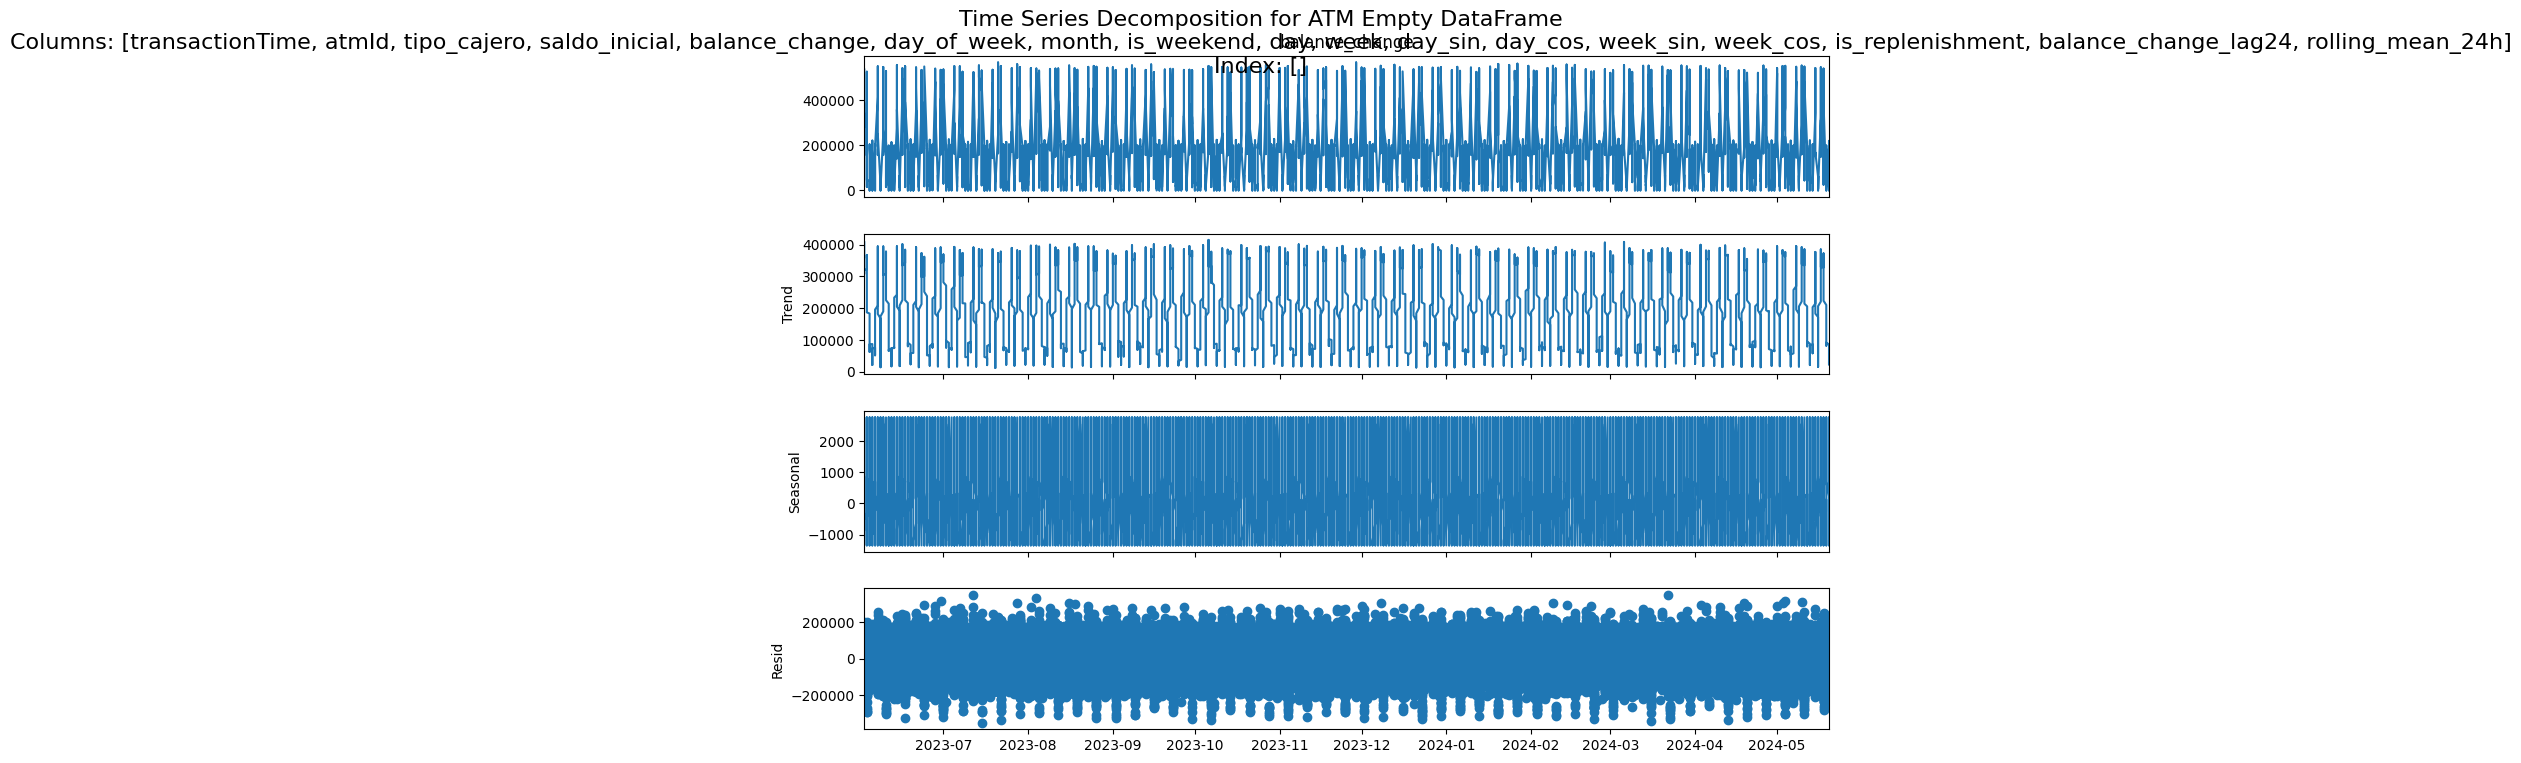

ADF Statistic: -15.434669054734186
p-value: 2.917695795121978e-28
Critical Value (1%): -3.430411386065687
Critical Value (5%): -2.861567131697627
Critical Value (10%): -2.566784441250053

Conclusion: The time series is Stationary.


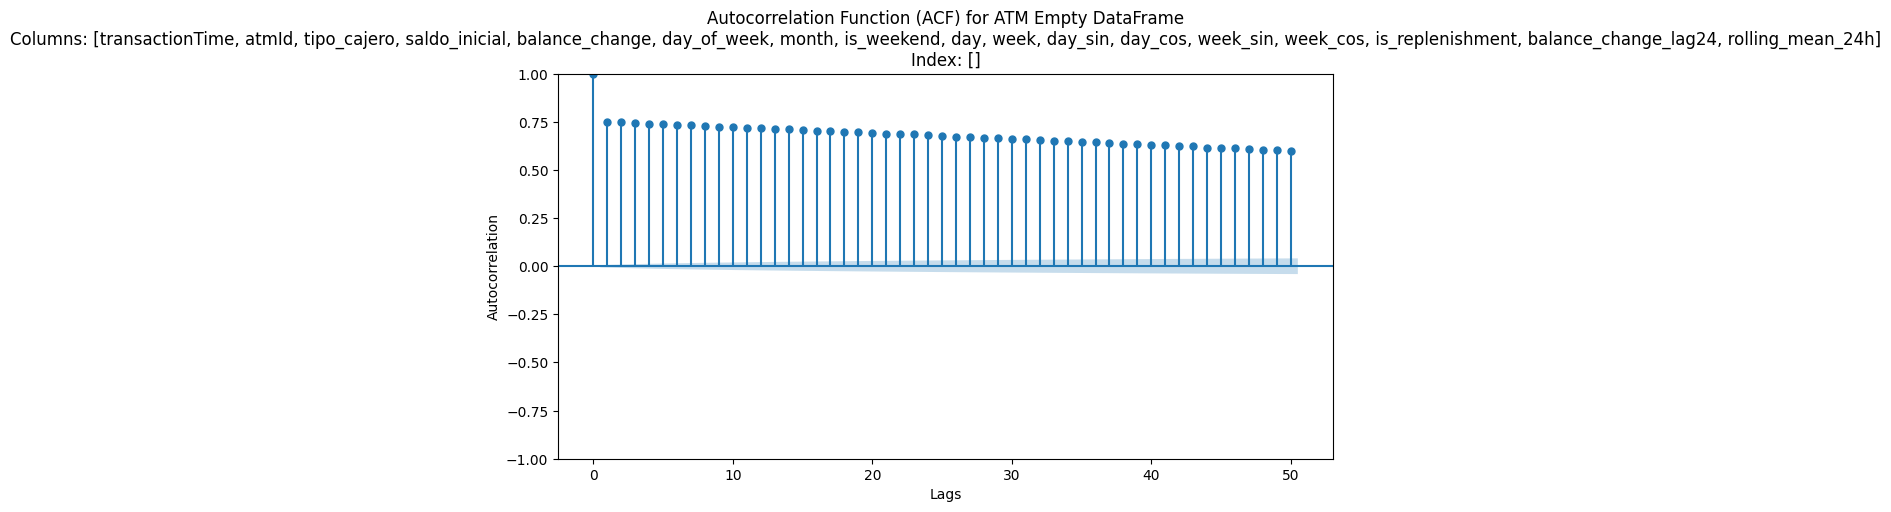

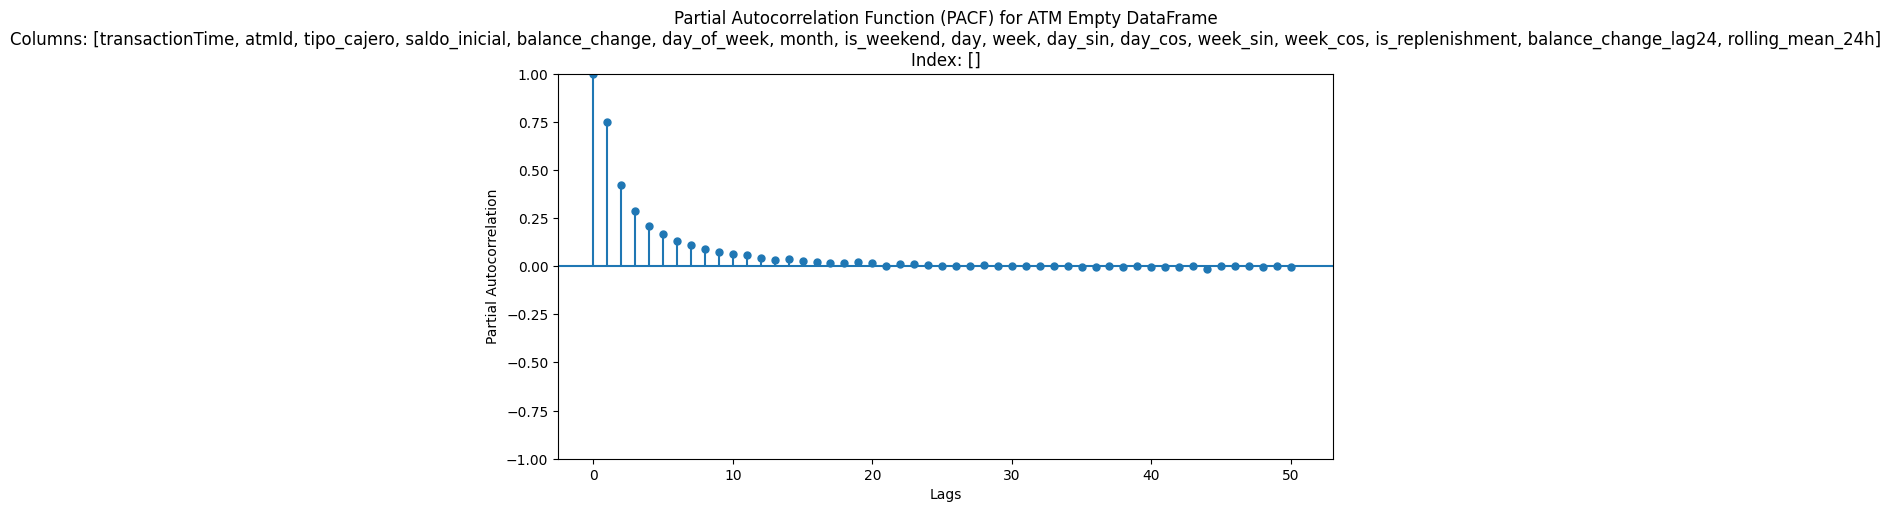

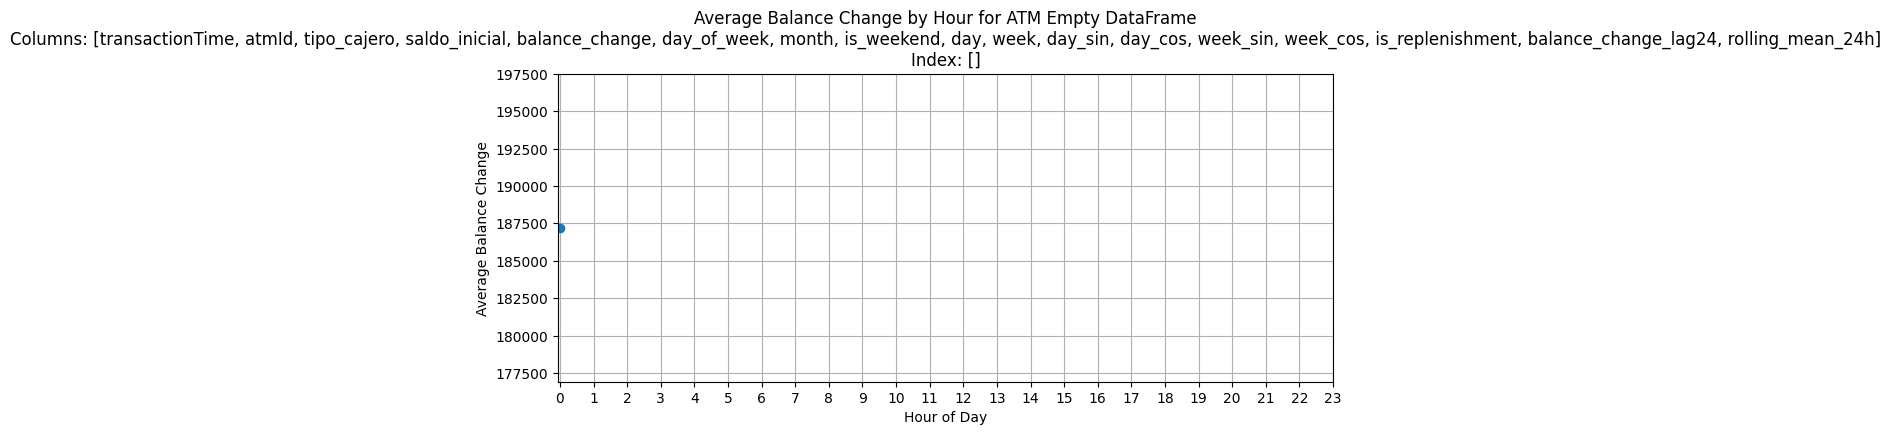

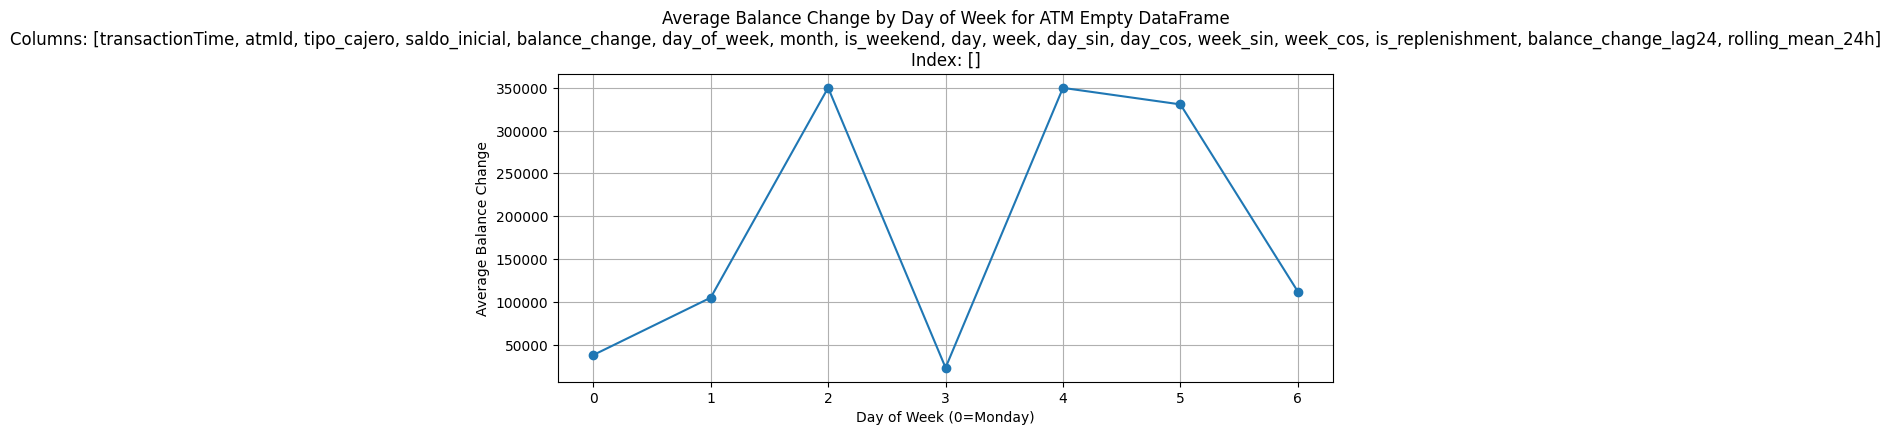

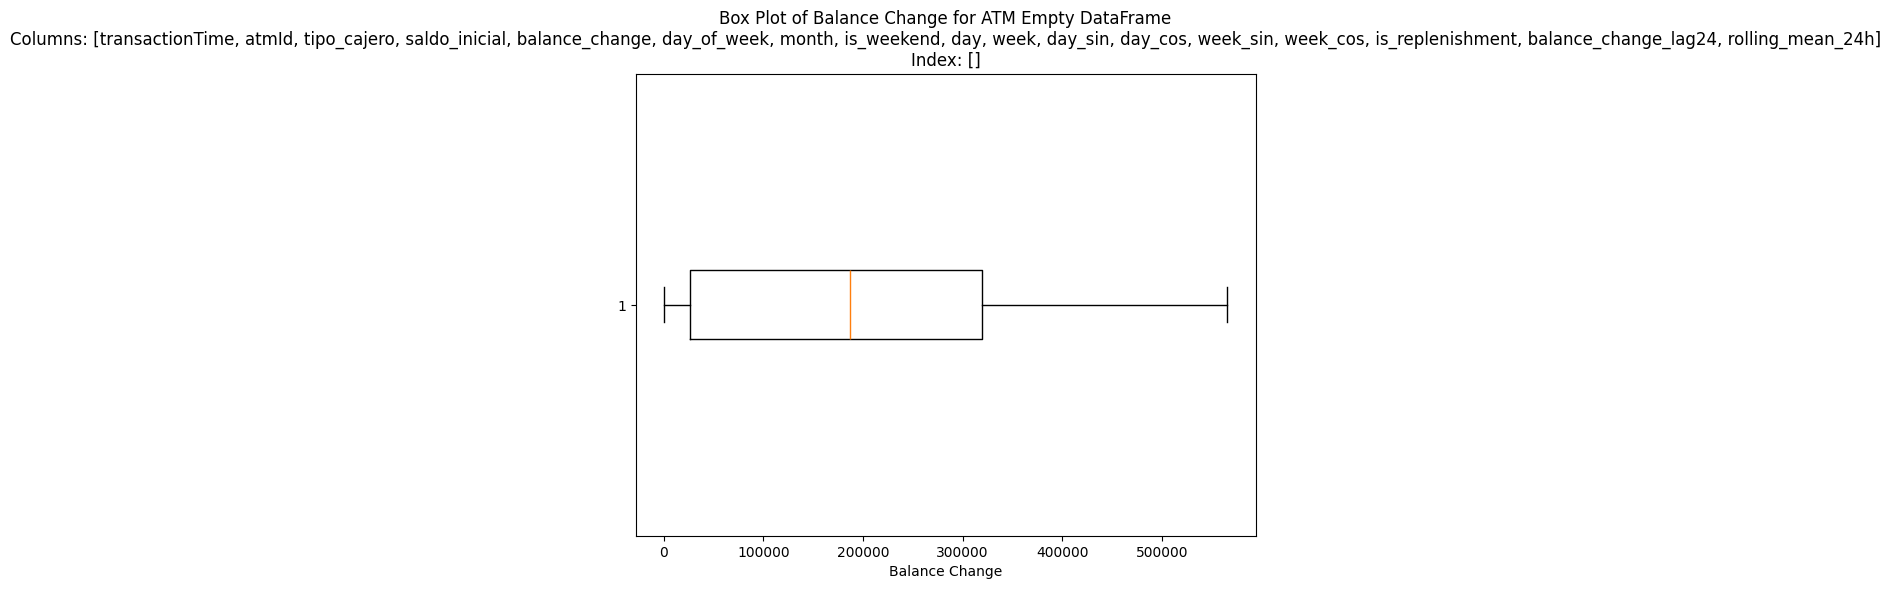

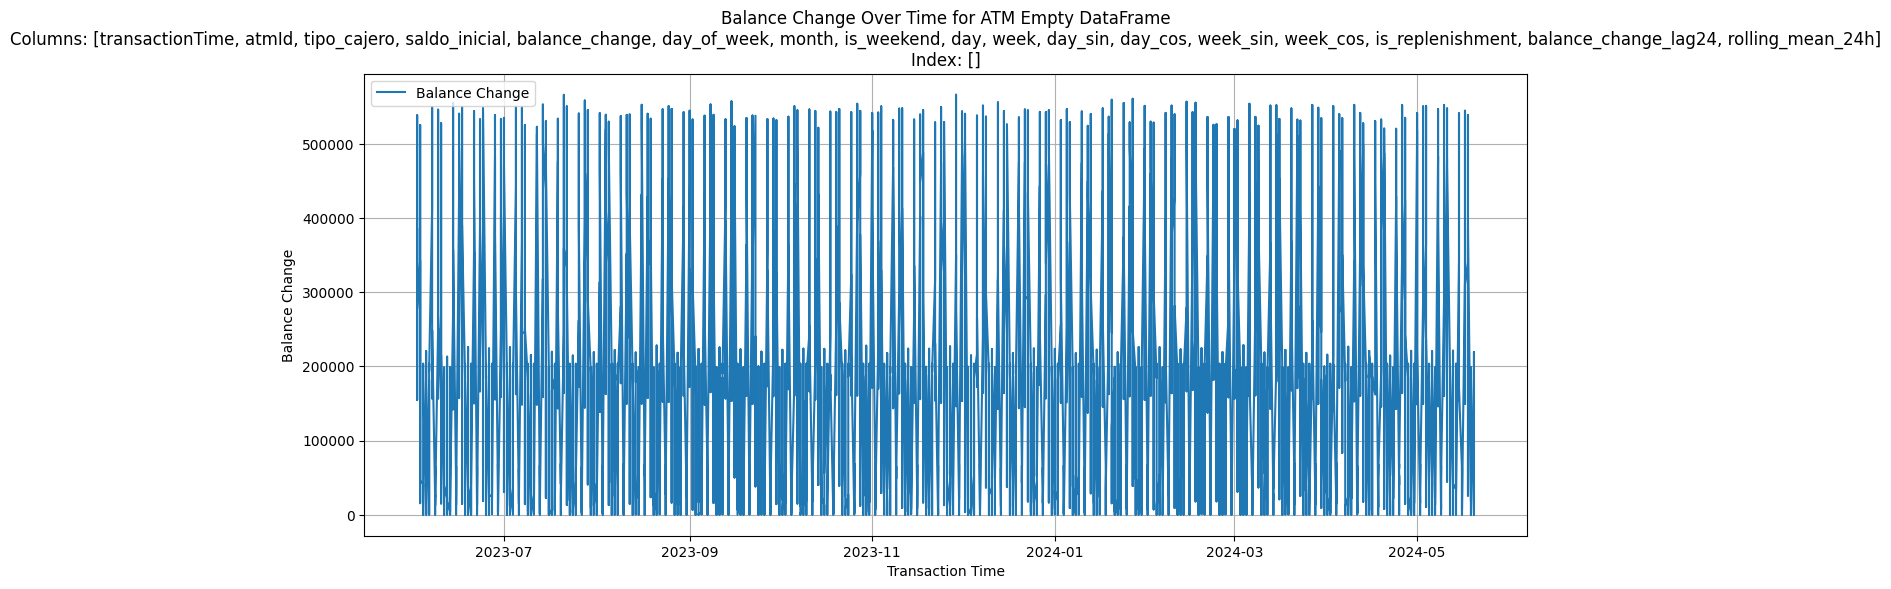

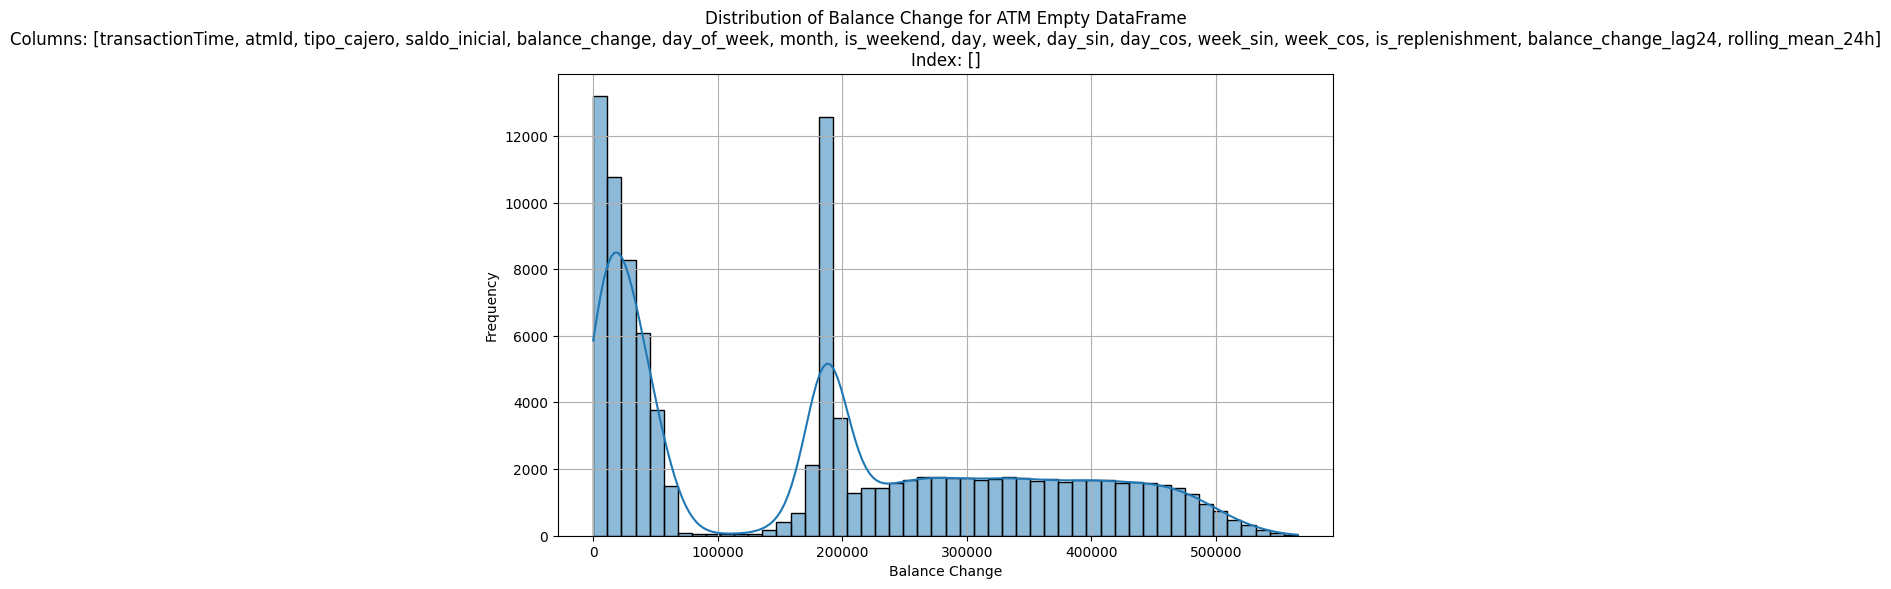


No additional numeric variables to compute correlation matrix.


In [12]:
#Gráficos univariados de una sola serie
gr.analyze_univariate_time_series(df_b,df_b[df_b['atmId']=='306'] )

## 4) Agrupación de Cajeros por Clústeres Basados en Características

1. **Clustering de Cajeros Tipo A**:
   - Se realiza el agrupamiento de cajeros tipo 'A' utilizando las características extraídas en `extracted_features_a` con un número de 8 clústeres, usando la función `perform_feature_based_clustering` de la librería de clustering (`cl`).
   - El resultado del agrupamiento (`atm_cluster_map_a`) se fusiona con el DataFrame `df_a` mediante el identificador único `atmId`, y se crea el DataFrame `df_a_clustered` que contiene las etiquetas de clúster para cada cajero.

2. **Clustering de Cajeros Tipo B**:
   - Se realiza el agrupamiento de cajeros tipo 'B' utilizando las características extraídas en `extracted_features_b` con un número de 12 clústeres, aplicando la misma función `perform_feature_based_clustering`.
   - El resultado del agrupamiento (`atm_cluster_map_b`) se fusiona con el DataFrame `df_b` mediante el identificador `atmId`, y se crea el DataFrame `df_b_clustered`.

3. **Obtención de Etiquetas de Clúster**:
   - Se extraen las etiquetas de los clústeres de ambos DataFrames `df_a_clustered` y `df_b_clustered` para obtener los clústeres únicos presentes en cada grupo de cajeros (`cluster_labels_a` y `cluster_labels_b`).

4. **Impresión de las Etiquetas de Clúster**:
   - Se imprimen las etiquetas de clúster para los cajeros tipo 'A' y tipo 'B', lo que permite visualizar la cantidad y diversidad de los clústeres generados.


In [13]:
atm_cluster_map_a = cl.perform_feature_based_clustering(extracted_features_a, n_clusters=8) 
df_a_clustered = df_a.merge(atm_cluster_map_a, on='atmId', how='left')
atm_cluster_map_b = cl.perform_feature_based_clustering(extracted_features_b, n_clusters=12) 
df_b_clustered = df_b.merge(atm_cluster_map_b, on='atmId', how='left')


In [14]:
#Agrupación de clusters
cluster_labels_a = df_a_clustered['cluster_label'].unique()
cluster_labels_b = df_b_clustered['cluster_label'].unique()

print(cluster_labels_a)
print(cluster_labels_b)

[1 7 2 6 4 0 5 3]
[11  6  4  5  2  3 10  1  8  7  9  0]


## 5) Visualización del Cambio de Balance Agregado por Clúster

1. **Propósito de la Función**:
   - La función `plot_clustered_time_series` está diseñada para visualizar el comportamiento del cambio de balance agregado por cada clúster de cajeros automáticos (ATMs).
   - Los datos se agrupan por hora, y se grafican los cambios de balance promedio para cada clúster.

2. **Parámetros**:
   - `df`: El DataFrame que contiene los datos de los cajeros automáticos, con las etiquetas de clúster ya asignadas.
   - `n_clusters`: El número de clústeres que se desean graficar (por defecto, 5).

3. **Proceso**:
   - Se determina el tamaño de la cuadrícula de subgráficos (siempre en números pares) según la cantidad de clústeres.
   - La función divide los datos en subgráficos, uno por cada clúster, y agrupa los datos por el tiempo de transacción (`transactionTime`) para calcular el cambio de balance promedio (`balance_change`).
   - Los datos de cambio de balance se grafican en el formato de línea para cada clúster.

4. **Gráficos**:
   - Para cada clúster, se crea un gráfico con el cambio de balance agregado a lo largo del tiempo.
   - Se ajustan las etiquetas del eje X (fecha) y se rotan para mejorar la legibilidad.
   - Se establece el título de cada gráfico con el número del clúster y se agregan etiquetas a los ejes.

5. **Visualización Final**:
   - Se muestra la visualización ajustada en una cuadrícula de subgráficos.


In [15]:
def plot_clustered_time_series(df, n_clusters=5):
    """
    Plot the aggregated balance change of all ATMs for each cluster, aggregated hourly.
    Subplots will be arranged based on the number of clusters.

    Parameters:
    - df: DataFrame containing ATM data with cluster labels.
    - n_clusters: Number of clusters.
    """
    # Determine the grid size (always even)
    n_rows = n_clusters // 2
    n_cols = 2

    # Create subplots with dynamic rows/cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))

    # Flatten the axes for easy iteration in case we have more than 1 row
    axes = axes.flatten()

    for cluster in range(n_clusters):
        cluster_data = df[df['cluster_label'] == cluster]
        
        # Convert transactionTime to datetime and format it
        cluster_data['transactionTime'] = pd.to_datetime(cluster_data['transactionTime']).dt.strftime('%Y-%m')

        # Group by formatted transactionTime and aggregate balance_change
        aggregated_balance_change = cluster_data.groupby('transactionTime')['balance_change'].mean()

        # Plot on the appropriate axis
        ax = axes[cluster]
        ax.plot(aggregated_balance_change.index, aggregated_balance_change.values, label=f'Cluster {cluster+1}')
        ax.set_title(f"Cluster {cluster+1}: Aggregated Balance Change (Hourly)")
        ax.set_xlabel("Date")
        ax.set_ylabel("Aggregated Balance Change")
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)
    
    # Adjust the layout to avoid overlap
    plt.tight_layout()
    plt.show()

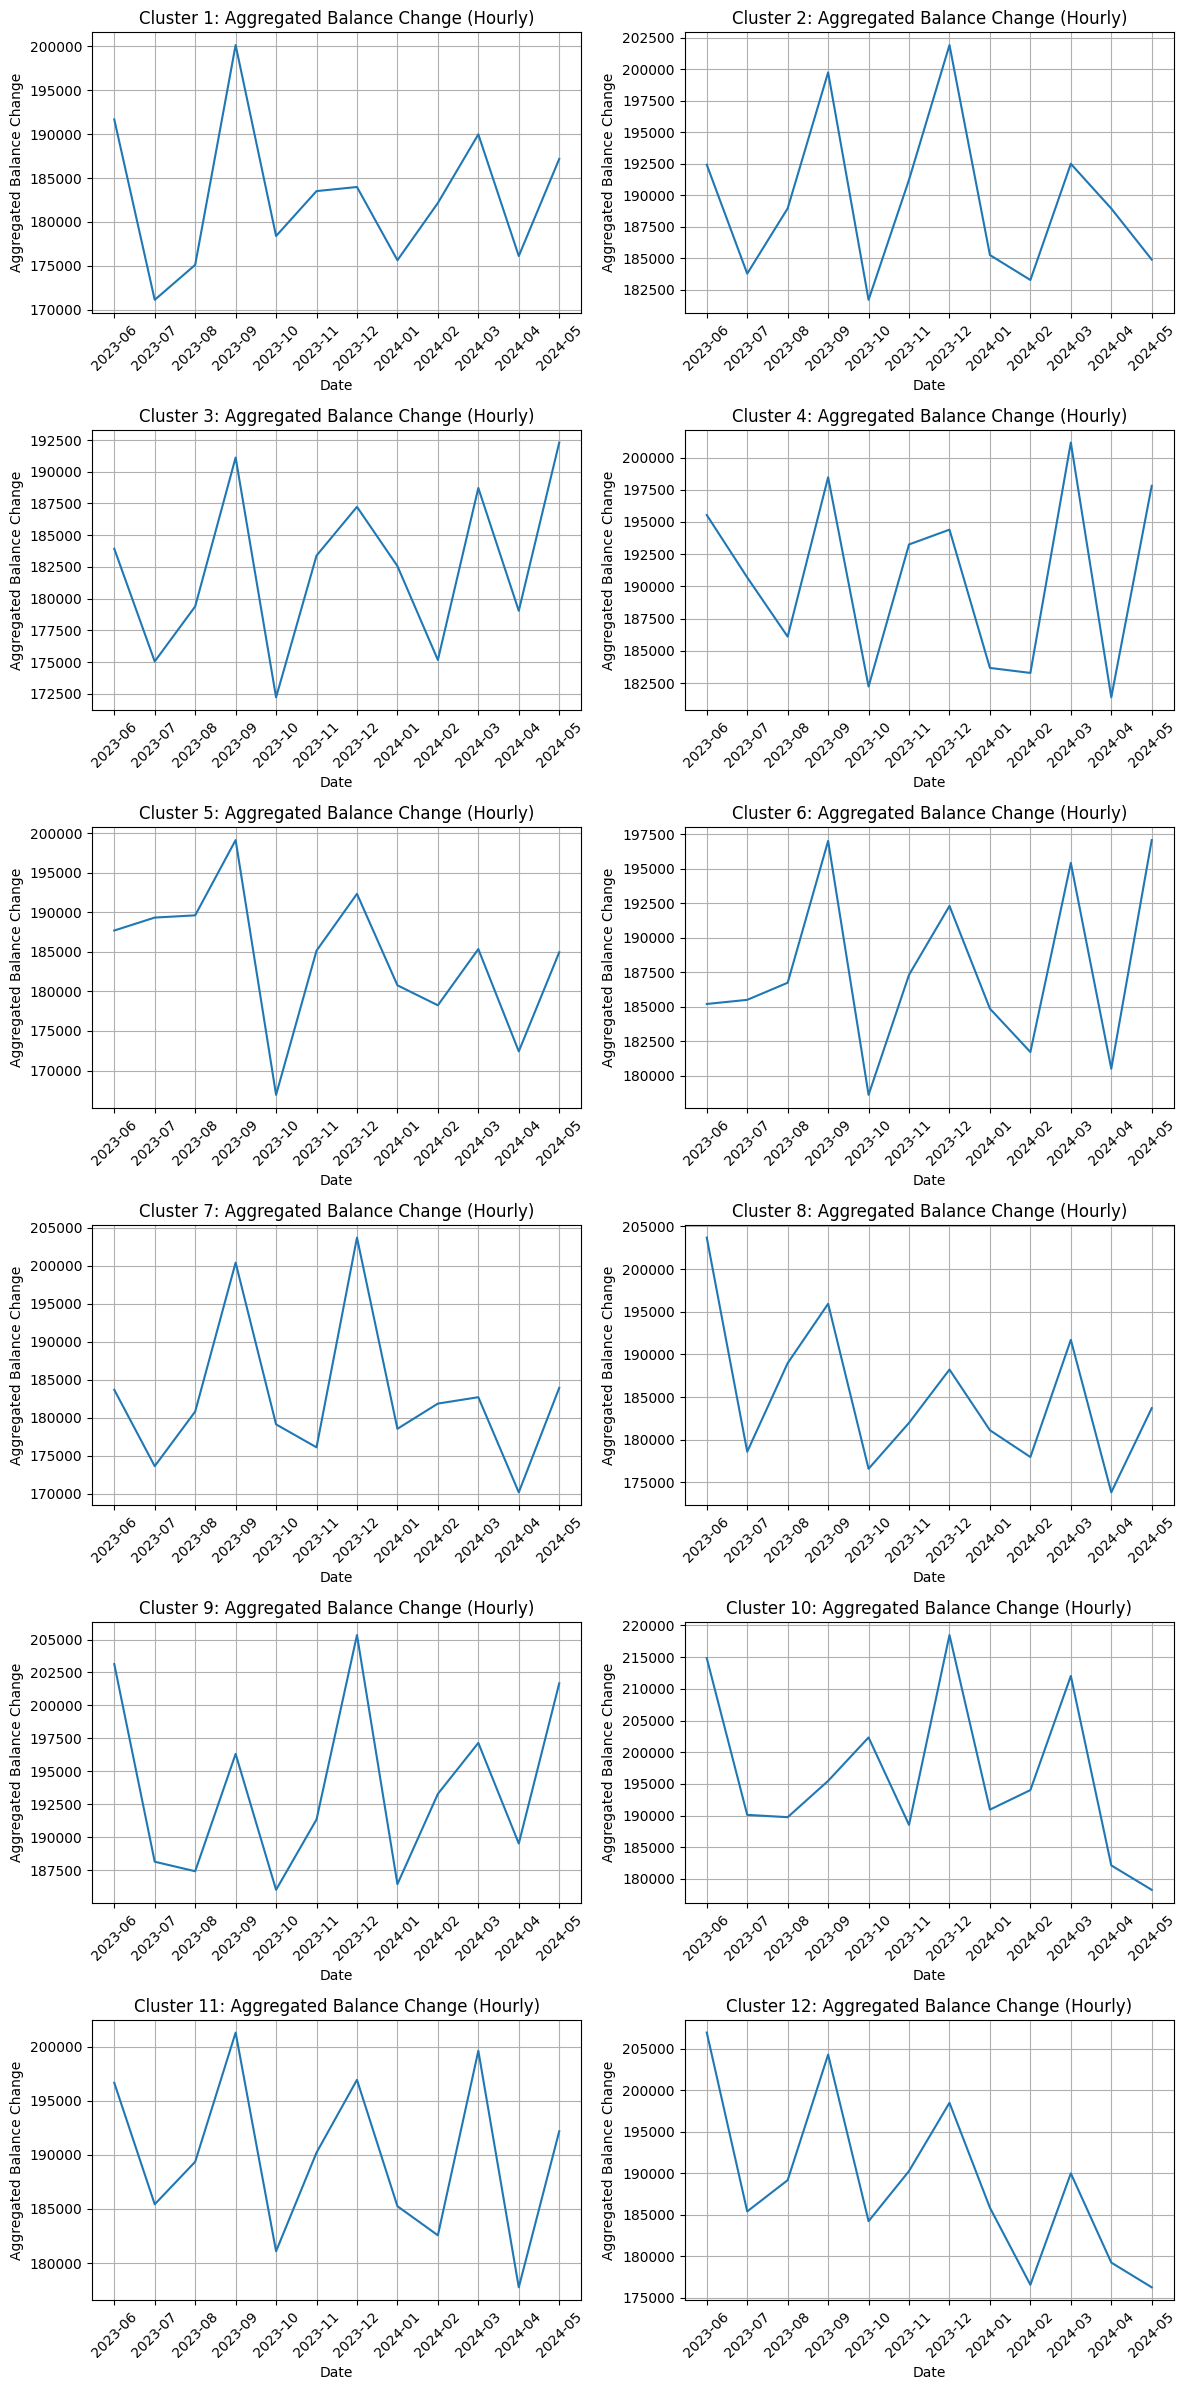

In [16]:
# Comportamiento de los clusters
plot_clustered_time_series(df_b_clustered, n_clusters=12)

## 6) Procesamiento de Datos por Clúster y Análisis de Clúster 0

1. **Propósito del Código**:
   - El objetivo es organizar los datos de los cajeros automáticos (ATM) según los clústeres y extraer información detallada del clúster 0.
   - Se crea un diccionario para almacenar los DataFrames correspondientes a cada clúster para los conjuntos `df_a_clustered` y `df_b_clustered`.
   - Se resetea el índice de cada DataFrame para cada clúster para asegurar que los datos estén bien estructurados.

2. **Proceso**:
   - Para cada clúster, se filtran los datos y se restablece el índice.
   - Los DataFrames resultantes de cada clúster se almacenan en un diccionario (`clustered_dataframes_a` y `clustered_dataframes_b`).
   - Además, se extraen datos específicos del clúster 0 de `df_b_clustered` y se imprime la cantidad de registros y cajeros automáticos únicos en ese clúster.
   
3. **Análisis Específico del Clúster 0**:
   - Se extraen los datos del clúster 0 del diccionario `clustered_dataframes_b`.
   - Se imprime la cantidad de registros que pertenecen al clúster 0.
   - Se calcula y se imprime la cantidad de cajeros automáticos únicos (`atmId`) en el clúster 0.

4. **Resultado Final**:
   - Los datos se agrupan por clúster, y se puede ver cuántos cajeros automáticos están presentes en cada clúster.
   - Se extrae y se muestra información específica para el clúster 0, incluyendo el número de registros y cajeros automáticos únicos.


In [17]:
# Initialize an empty dictionary to store DataFrames for each cluster
clustered_dataframes_a = {}
clustered_dataframes_b = {}
# Loop over each cluster label and create a DataFrame for each
for label in cluster_labels_a:
    cluster_df = df_a_clustered[df_a_clustered['cluster_label'] == label]
    
    # Reset the index for the filtered DataFrame and drop the old index
    cluster_df.reset_index(drop=True, inplace=True)
    
    # Store the reset DataFrame in the dictionary
    clustered_dataframes_a[label] = cluster_df
# Optionally, print the number of ATMs in each cluster
for label, df_cluster in clustered_dataframes_a.items():
    num_atms = df_cluster['atmId'].nunique()
    print(f"Cluster {label}: {num_atms} unique ATMs")

print('DIVISION')
for label in cluster_labels_b:
    cluster_df = df_b_clustered[df_b_clustered['cluster_label'] == label]
    
    # Reset the index for the filtered DataFrame and drop the old index
    cluster_df.reset_index(drop=True, inplace=True)
    # Store the reset DataFrame in the dictionary
    clustered_dataframes_b[label] = cluster_df
# Optionally, print the number of ATMs in each cluster
for label, df_cluster in clustered_dataframes_b.items():
    num_atms = df_cluster['atmId'].nunique()
    print(f"Cluster {label}: {num_atms} unique ATMs")

Cluster 1: 80 unique ATMs
Cluster 7: 55 unique ATMs
Cluster 2: 30 unique ATMs
Cluster 6: 73 unique ATMs
Cluster 4: 51 unique ATMs
Cluster 0: 3 unique ATMs
Cluster 5: 56 unique ATMs
Cluster 3: 51 unique ATMs
DIVISION
Cluster 11: 22 unique ATMs
Cluster 6: 12 unique ATMs
Cluster 4: 14 unique ATMs
Cluster 5: 53 unique ATMs
Cluster 2: 48 unique ATMs
Cluster 3: 44 unique ATMs
Cluster 10: 28 unique ATMs
Cluster 1: 22 unique ATMs
Cluster 8: 15 unique ATMs
Cluster 7: 31 unique ATMs
Cluster 9: 2 unique ATMs
Cluster 0: 10 unique ATMs


In [18]:

# Extract data for cluster 0
cluster_0 = clustered_dataframes_b[0]

# Display basic information
print(f"Number of records in cluster 0: {len(cluster_0)}")
print(f"Number of unique ATMs in cluster 0: {cluster_0['atmId'].nunique()}")

Number of records in cluster 0: 3540
Number of unique ATMs in cluster 0: 10


## 7) Procesamiento de Datos por Clúster en `clustered_dataframes_a` y `clustered_dataframes_b`

### 1. **Propósito del Código**:
   El objetivo principal es procesar los datos de los cajeros automáticos (ATM) agrupados en diferentes clústeres. Este código organiza los datos de cada clúster y genera nuevas características útiles para análisis de series de tiempo, como lags y medias móviles. Se crean dos diccionarios (`processed_data_a` y `processed_data_b`) que contienen los datos procesados para cada clúster.

### 2. **Proceso**:
   - **Inicialización de diccionarios**: 
     Se crean dos diccionarios vacíos (`processed_data_a` y `processed_data_b`) para almacenar los resultados procesados para los clústeres de `clustered_dataframes_a` y `clustered_dataframes_b`.
   
   - **Iteración sobre los Clústeres**:
     Se itera sobre cada clúster en `clustered_dataframes_a` y `clustered_dataframes_b`. Para cada clúster:
     - Se obtiene la lista de `atmId` únicos presentes en ese clúster.
     - Se almacena esta lista de `atmId` en un diccionario asociado a cada clúster.

   - **Procesamiento de los Datos por `atmId`**:
     - Para cada cajero automático (`atmId`) dentro del clúster:
       - Se filtra el DataFrame para obtener solo los registros correspondientes a ese `atmId`.
       - Se procesan los datos para crear características de *lag* utilizando la función `gr.process_lag_data`, que identifica los lags más significativos.
       - Se calcula una lista de ventanas de tiempo para las medias móviles, basadas en los lags significativos. Si no hay lags significativos, se usan ventanas predeterminadas de 24 horas (diarias) y 168 horas (semanales).
       - Se generan nuevas características de medias móviles utilizando la función `gr.create_rolling_mean_features`.

   - **Almacenaje de Datos Procesados**:
     - Los datos procesados para cada cajero se almacenan dentro del diccionario correspondiente a ese clúster.
     - Los diccionarios de datos procesados se almacenan finalmente en `processed_data_a` y `processed_data_b` para todos los clústeres.

### 3. **Análisis Específico**:
   Aunque el análisis en este código no se centra en un clúster específico, se realiza un procesamiento detallado para cada clúster y cada cajero automático dentro de él. La idea es generar características adicionales (lags y medias móviles) que puedan ser útiles para la predicción de futuros comportamientos de los cajeros automáticos.
   El procesamiento de datos incluye el cálculo de lags significativos y la creación de medias móviles que ayudan a modelar el comportamiento temporal de las transacciones en los cajeros automáticos.

### 4. **Resultado Final**:
   El resultado final es un conjunto de datos enriquecido con características adicionales, como los lags y las medias móviles, que pueden ser utilizados para modelos predictivos.
   Los datos de cada cajero se almacenan y organizan por clúster, lo que facilita un análisis más segmentado y específico según las características de cada grupo de cajeros automáticos.
   Los datos procesados estarán listos para su posterior análisis o para alimentar modelos de predicción que consideren la temporalidad y los patrones históricos de cada cajero automático.


In [28]:
# Initialize the top-level dictionary to collect processed data for all clusters
processed_data_a = {}
processed_data_b = {}
# Loop over each cluster in clustered_dataframes
for cluster_label, cluster_df in clustered_dataframes_a.items():
    print(f"\nProcessing cluster {cluster_label}")
    
    # Initialize the cluster-level dictionary
    cluster_dict = {}
    
    # Get the list of unique atmIds in this cluster
    atm_ids = cluster_df['atmId'].unique().tolist()
    
    # Store the list of ATM IDs in the cluster dictionary
    cluster_dict['atm_ids'] = atm_ids
    
    # Loop over each atmId in the cluster
    for atm_id in atm_ids:
        print(f"Processing ATM {atm_id} in cluster {cluster_label}")
        # Get the data for this ATM
        atm_data = cluster_df[cluster_df['atmId'] == atm_id].copy()
        
        # Process ATM data to create lag features
        atm_data_processed, significant_lags = gr.process_lag_data(atm_data)
        print(f"Significant lags for ATM {atm_id}: {significant_lags}")
        
        # Get significant lags for rolling windows (e.g., lags >= 24)
        rolling_windows = [lag for lag in significant_lags if lag >= 24]
        
        # Ensure some default windows if none are significant
        if not rolling_windows:
            rolling_windows = [24, 168]  # Daily and weekly
        
        # Create rolling mean features
        atm_data_processed = gr.create_rolling_mean_features(atm_data_processed, rolling_windows)
        
        # Handle missing values (optional)
        #atm_data_processed.dropna(inplace=True)
        
        # Store the processed DataFrame in the cluster dictionary
        cluster_dict[atm_id] = atm_data_processed
    
    # Add the cluster dictionary to the top-level dictionary
    processed_data_a[cluster_label] = cluster_dict
for cluster_label, cluster_df in clustered_dataframes_b.items():
    print(f"\nProcessing cluster {cluster_label}")
    
    # Initialize the cluster-level dictionary
    cluster_dict = {}
    
    # Get the list of unique atmIds in this cluster
    atm_ids = cluster_df['atmId'].unique().tolist()
    
    # Store the list of ATM IDs in the cluster dictionary
    cluster_dict['atm_ids'] = atm_ids
    
    # Loop over each atmId in the cluster
    for atm_id in atm_ids:
        print(f"Processing ATM {atm_id} in cluster {cluster_label}")
        # Get the data for this ATM
        atm_data = cluster_df[cluster_df['atmId'] == atm_id].copy()
        
        # Process ATM data to create lag features
        atm_data_processed, significant_lags = gr.process_lag_data(atm_data)
        print(f"Significant lags for ATM {atm_id}: {significant_lags}")
        
        # Get significant lags for rolling windows (e.g., lags >= 24)
        rolling_windows = [lag for lag in significant_lags if lag >= 24]
        
        # Ensure some default windows if none are significant
        if not rolling_windows:
            rolling_windows = [24, 168]  # Daily and weekly
        
        # Create rolling mean features
        atm_data_processed = gr.create_rolling_mean_features(atm_data_processed, rolling_windows)
        
        # Handle missing values (optional)
        #atm_data_processed.dropna(inplace=True)
        
        # Store the processed DataFrame in the cluster dictionary
        cluster_dict[atm_id] = atm_data_processed
    
    # Add the cluster dictionary to the top-level dictionary
    processed_data_b[cluster_label] = cluster_dict
print("\nProcessing complete.")
processed_data_a
processed_data_b


Processing cluster 1
Processing ATM 302 in cluster 1
Significant lags for ATM 302: [2, 3, 4, 5, 7, 9, 10, 11, 12, 14, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 42, 44, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 59, 60, 61, 63, 65, 66, 67, 68, 70, 72, 73, 74, 75, 77, 79, 80, 81, 82, 84, 86, 87, 88, 89, 91, 93, 94, 95, 96, 98, 100, 101, 102, 103, 105, 107, 108, 109, 110, 112, 114, 115, 116, 117, 119, 121, 122, 123, 124, 126, 128, 129, 130, 131, 133, 135, 136, 137, 138, 140, 142, 143, 144, 145, 147, 149, 150, 151, 152, 154, 156, 157, 158]
Processing ATM 307 in cluster 1
Significant lags for ATM 307: [2, 3, 4, 5, 7, 9, 10, 11, 12, 14, 16, 17, 18, 19, 21, 23, 24, 25, 26, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 42, 44, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 59, 60, 61, 63, 65, 66, 67, 68, 70, 72, 73, 74, 75, 77, 79, 80, 81, 82, 84, 86, 87, 88, 89, 91, 93, 94, 95, 96, 98, 100, 101, 102, 103, 105, 107, 108, 109, 110, 112, 114, 115, 116, 117, 119, 121, 122, 123,

{11: {'atm_ids': [1,
   3,
   10,
   45,
   48,
   61,
   71,
   91,
   97,
   107,
   108,
   120,
   149,
   175,
   188,
   193,
   211,
   238,
   242,
   287,
   290,
   297],
  1:     transactionTime  atmId tipo_cajero  saldo_inicial  balance_change  \
  0        2023-06-02      1           B       647830.0       384630.00   
  1        2023-06-03      1           B       263200.0       251860.00   
  2        2023-06-04      1           B        11340.0       185076.25   
  3        2023-06-05      1           B        64250.0        24710.00   
  4        2023-06-06      1           B       396870.0        44010.00   
  ..              ...    ...         ...            ...             ...   
  349      2024-05-16      1           B       419320.0        14510.00   
  350      2024-05-17      1           B       899340.0       355740.00   
  351      2024-05-18      1           B       543600.0       455110.00   
  352      2024-05-19      1           B        88490.0        178

##  8) Procesamiento de Datos por Clúster en `processed_data_agg_a` y `processed_data_agg_b`

### 1. **Propósito del Código**:
   El objetivo principal de este código es procesar los datos de los cajeros automáticos (ATM) por clústeres. Se agregan los cambios de balance por hora, se crean características adicionales relacionadas con los lags significativos y se generan medias móviles. Los resultados procesados se almacenan en dos diccionarios, `processed_data_agg_a` y `processed_data_agg_b`, para cada uno de los clústeres de los DataFrames `clustered_dataframes_a` y `clustered_dataframes_b`.

### 2. **Proceso**:
   - **Inicialización de diccionarios**:
     Se crean dos diccionarios vacíos: `processed_data_agg_a` y `processed_data_agg_b` para almacenar los resultados procesados de cada clúster.

   - **Iteración sobre los clústeres**:
     El proceso se realiza de manera similar para ambos conjuntos de clústeres (`clustered_dataframes_a` y `clustered_dataframes_b`):
     - **Extracción de `atmId`**:
       Se obtiene una lista de los `atmId` únicos presentes en cada clúster, lo que permite identificar los cajeros automáticos en cada grupo.
     
     - **Reagregación de datos**:
       Se agrupan los datos de las transacciones por la columna `transactionTime`, sumando los valores de `balance_change` para cada intervalo de tiempo (hora).
       Esto genera una serie temporal del cambio de balance por hora, agregando los datos de todos los cajeros automáticos del clúster.

     - **Procesamiento de datos de lags**:
       Se utiliza la función `gr.process_lag_data` para procesar los datos y obtener los lags significativos para la serie temporal de `balance_change`.

     - **Selección de ventanas para medias móviles**:
       Se filtran los lags significativos que sean mayores o iguales a 24, lo que permite identificar las ventanas de tiempo relevantes para las medias móviles. Si no hay lags significativos, se utilizan ventanas predeterminadas de 24 horas (diarias) y 168 horas (semanales).

     - **Generación de medias móviles**:
       Se genera una serie de características de medias móviles utilizando la función `gr.create_rolling_mean_features`, basándose en las ventanas seleccionadas.

     - **Almacenaje de los datos procesados**:
       Los datos procesados se almacenan en los diccionarios correspondientes, con información del clúster (`cluster_number`), los `atm_ids` del clúster y los datos procesados.

### 3. **Análisis Específico**:
   Este código no realiza un análisis específico de cada clúster, pero sí prepara los datos para un análisis posterior. Se procesan características temporales y de cambio de balance, lo que permite comprender el comportamiento de los cajeros automáticos a lo largo del tiempo. Además, se incorporan lags y medias móviles, que pueden ser útiles para modelos predictivos.

### 4. **Resultado Final**:
   El resultado final es un conjunto de datos procesados que incluye las características agregadas por hora, lags significativos y medias móviles. Estos datos pueden ser utilizados en análisis posteriores o como entrada para modelos predictivos.
   
   Los datos de cada clúster se organizan y se almacenan en los diccionarios `processed_data_agg_a` y `processed_data_agg_b`, donde están listos para su análisis y modelado.


In [19]:
# Initialize the top-level dictionary to collect processed data for all clusters
processed_data_agg_a = {}
processed_data_agg_b = {}
for cluster_label, cluster_df in clustered_dataframes_a.items():
    print(f"\nProcessing cluster {cluster_label}")
    
    # Get the list of unique atmIds in this cluster
    atm_ids = cluster_df['atmId'].unique().tolist()
    
    print(cluster_df.head())
    # Resample the data to hourly intervals, summing 'balance_change'
    # This gives us a time series of balance_change per hour, aggregated over all ATMs in the cluster
    cluster_aggregated = cluster_df.groupby(['transactionTime'])['balance_change'].sum()
    print(type(cluster_aggregated))
    print(cluster_aggregated)
    # Reset index to have 'transactionTime' as a column
    cluster_aggregated_df = cluster_aggregated.reset_index()
    print(cluster_aggregated_df.head())
    cluster_data_processed, significant_lags = gr.process_lag_data(cluster_aggregated_df)
    print(significant_lags)
    # Get significant lags for rolling windows (e.g., lags >= 24)
    rolling_windows = [lag for lag in significant_lags if lag >= 24]
    
    # Ensure some default windows if none are significant
    if not rolling_windows:
        rolling_windows = [24, 168]  # Daily and weekly
    
    # Create rolling mean features
    cluster_data_processed = gr.create_rolling_mean_features(cluster_data_processed, rolling_windows)
    
    # Handle missing values
    #cluster_data_processed.dropna(inplace=True)
    
    # Store the data in the processed_data dictionary
    processed_data_agg_a[cluster_label] = {
        'cluster_number': cluster_label,
        'atm_ids': atm_ids,
        'data': cluster_data_processed
    }

print("\nProcessing complete.")

for cluster_label, cluster_df in clustered_dataframes_b.items():
    print(f"\nProcessing cluster {cluster_label}")
    
    # Get the list of unique atmIds in this cluster
    atm_ids = cluster_df['atmId'].unique().tolist()
    
    print(cluster_df.head())
    # Resample the data to hourly intervals, summing 'balance_change'
    # This gives us a time series of balance_change per hour, aggregated over all ATMs in the cluster
    cluster_aggregated = cluster_df.groupby(['transactionTime'])['balance_change'].sum()
    print(type(cluster_aggregated))
    print(cluster_aggregated)
    # Reset index to have 'transactionTime' as a column
    cluster_aggregated_df = cluster_aggregated.reset_index()
    print(cluster_aggregated_df.head())
    cluster_data_processed, significant_lags = gr.process_lag_data(cluster_aggregated_df)
    print(significant_lags)
    # Get significant lags for rolling windows (e.g., lags >= 24)
    rolling_windows = [lag for lag in significant_lags if lag >= 24]
    
    # Ensure some default windows if none are significant
    if not rolling_windows:
        rolling_windows = [24, 168]  # Daily and weekly
    
    # Create rolling mean features
    cluster_data_processed = gr.create_rolling_mean_features(cluster_data_processed, rolling_windows)
    
    # Handle missing values
    #cluster_data_processed.dropna(inplace=True)
    
    # Store the data in the processed_data dictionary
    processed_data_agg_b[cluster_label] = {
        'cluster_number': cluster_label,
        'atm_ids': atm_ids,
        'data': cluster_data_processed
    }

print("\nProcessing complete.")



Processing cluster 1
  transactionTime  atmId tipo_cajero  saldo_inicial  balance_change  \
0      2023-06-02    302           A        70720.0    11760.000000   
1      2023-06-03    302           A       409420.0   170670.921875   
2      2023-06-04    302           A       426670.0   343400.000000   
3      2023-06-05    302           A        83270.0    43520.000000   
4      2023-06-06    302           A       421440.0    16710.000000   

   day_of_week  month  is_weekend  day  week   day_sin   day_cos  week_sin  \
0            4      6           0    2     1 -0.433884 -0.900969       1.0   
1            5      6           1    3     1 -0.974928 -0.222521       1.0   
2            6      6           1    4     1 -0.781832  0.623490       1.0   
3            0      6           0    5     1  0.000000  1.000000       1.0   
4            1      6           0    6     1  0.781832  0.623490       1.0   

       week_cos  is_replenishment  balance_change_lag24  rolling_mean_24h  \
0  6.

## 9) Creación de Series de Tiempo Agregadas para 'a', 'b' y 'a+b'

### 1. **Propósito del Código**:
   El objetivo de este código es agregar los datos de los clústeres para los grupos 'a', 'b' y 'a+b'. Para cada uno de estos grupos:
   - Se agregan los cambios de balance por hora.
   - Se procesan los datos generando características de lags y medias móviles.
   - Se almacenan los resultados procesados en tres diccionarios distintos.

### 2. **Proceso**:

   - **Inicialización de Diccionarios**:
     Se crean tres diccionarios vacíos: `processed_data_total_a`, `processed_data_total_b`, y `processed_data_total_ab`, para almacenar los datos agregados de cada grupo.

   - **Agregación de los Clústeres en 'a'**:
     Para cada clúster en el grupo 'a':
     - Se obtiene y concatena los datos de los clústeres.
     - Se realiza una agregación por la columna `transactionTime`, sumando la columna `balance_change`.
     - Se procesan los lags significativos y se generan características de medias móviles.
     - Los datos procesados se almacenan en el diccionario `processed_data_total_a`.

   - **Agregación de los Clústeres en 'b'**:
Se repite el mismo proceso que para 'a', pero para el grupo 'b', almacenando los resultados en `processed_data_total_b`.

   - **Agregación de los Grupos 'a' y 'b' para Obtener 'a+b'**:
     Se fusionan los datos agregados de los grupos 'a' y 'b' en una sola tabla por la columna `transactionTime`.
     - Se suman las columnas `balance_change_a` y `balance_change_b` para obtener la columna combinada `balance_change`.
     - Se procesan los lags y se crean características de medias móviles.
     - Los datos procesados se almacenan en el diccionario `processed_data_total_ab`.

   - **Diccionario Final con los Tres Grupos**:
     Finalmente, se almacenan los tres grupos ('a', 'b', 'a+b') en un solo diccionario llamado `processed_data_total`.

### 3. **Resultado Final**:
   El código devuelve un diccionario final, `processed_data_total`, que contiene los datos procesados de cada grupo, listos para análisis o modelado posterior.


In [37]:
# Crear las series de tiempo agregadas para 'a', 'b' y 'a+b'

# Importar librerías necesarias
import pandas as pd

# Diccionarios para almacenar los datos agregados
processed_data_total_a = {}
processed_data_total_b = {}
processed_data_total_ab = {}

# Agregar todos los clústeres en 'a'
print("\nAgregando todos los clústeres en el grupo 'a'")

# Lista para almacenar los dataframes de cada clúster en 'a'
cluster_dataframes_a = []

for cluster_info in processed_data_agg_a.values():
    cluster_data_processed = cluster_info['data']
    cluster_dataframes_a.append(cluster_data_processed[['transactionTime', 'balance_change']])

# Concatenar todos los dataframes de los clústeres en 'a'
all_data_a = pd.concat(cluster_dataframes_a)

# Sumar 'balance_change' por 'transactionTime'
total_aggregated_a = all_data_a.groupby('transactionTime')['balance_change'].sum().reset_index()

# Procesar los datos agregados como antes
cluster_data_processed_a, significant_lags_a = gr.process_lag_data(total_aggregated_a)

# Obtener lags significativos para las ventanas móviles (por ejemplo, lags >= 24)
rolling_windows_a = [lag for lag in significant_lags_a if lag >= 24]

# Asegurar ventanas predeterminadas si no hay lags significativos
if not rolling_windows_a:
    rolling_windows_a = [24, 168]  # Diaria y semanal

# Crear características de media móvil
cluster_data_processed_a = gr.create_rolling_mean_features(cluster_data_processed_a, rolling_windows_a)

# Almacenar los datos en el diccionario
processed_data_total_a = {
    'group': 'a',
    'data': cluster_data_processed_a
}

# Agregar todos los clústeres en 'b'
print("\nAgregando todos los clústeres en el grupo 'b'")

# Lista para almacenar los dataframes de cada clúster en 'b'
cluster_dataframes_b = []

for cluster_info in processed_data_agg_b.values():
    cluster_data_processed = cluster_info['data']
    cluster_dataframes_b.append(cluster_data_processed[['transactionTime', 'balance_change']])

# Concatenar todos los dataframes de los clústeres en 'b'
all_data_b = pd.concat(cluster_dataframes_b)

# Sumar 'balance_change' por 'transactionTime'
total_aggregated_b = all_data_b.groupby('transactionTime')['balance_change'].sum().reset_index()

# Procesar los datos agregados como antes
cluster_data_processed_b, significant_lags_b = gr.process_lag_data(total_aggregated_b)

# Obtener lags significativos para las ventanas móviles
rolling_windows_b = [lag for lag in significant_lags_b if lag >= 24]

# Asegurar ventanas predeterminadas si no hay lags significativos
if not rolling_windows_b:
    rolling_windows_b = [24, 168]  # Diaria y semanal

# Crear características de media móvil
cluster_data_processed_b = gr.create_rolling_mean_features(cluster_data_processed_b, rolling_windows_b)

# Almacenar los datos en el diccionario
processed_data_total_b = {
    'group': 'b',
    'data': cluster_data_processed_b
}

# Agregar los grupos 'a' y 'b' para obtener 'a+b'
print("\nAgregando los grupos 'a' y 'b' para obtener 'a+b'")

# Fusionar los datos agregados de 'a' y 'b' en 'transactionTime'
total_aggregated_ab = pd.merge(
    total_aggregated_a,
    total_aggregated_b,
    on='transactionTime',
    how='outer',
    suffixes=('_a', '_b')
)

# Reemplazar NaN con 0
total_aggregated_ab.fillna(0, inplace=True)

# Sumar las columnas 'balance_change' de 'a' y 'b'
total_aggregated_ab['balance_change'] = total_aggregated_ab['balance_change_a'] + total_aggregated_ab['balance_change_b']

# Mantener solo 'transactionTime' y 'balance_change'
total_aggregated_ab = total_aggregated_ab[['transactionTime', 'balance_change']]

# Procesar los datos agregados como antes
cluster_data_processed_ab, significant_lags_ab = gr.process_lag_data(total_aggregated_ab)

# Obtener lags significativos para las ventanas móviles
rolling_windows_ab = [lag for lag in significant_lags_ab if lag >= 24]

# Asegurar ventanas predeterminadas si no hay lags significativos
if not rolling_windows_ab:
    rolling_windows_ab = [24, 168]  # Diaria y semanal

# Crear características de media móvil
cluster_data_processed_ab = gr.create_rolling_mean_features(cluster_data_processed_ab, rolling_windows_ab)

# Almacenar los datos en el diccionario
processed_data_total_ab = {
    'group': 'a+b',
    'data': cluster_data_processed_ab
}

# Almacenar todos los datos agregados en un diccionario final
processed_data_total = {
    'a': processed_data_total_a,
    'b': processed_data_total_b,
    'a+b': processed_data_total_ab
}

print("\nAgregación completa.")



Agregando todos los clústeres en el grupo 'a'

Agregando todos los clústeres en el grupo 'b'

Agregando los grupos 'a' y 'b' para obtener 'a+b'

Agregación completa.


In [43]:
processed_data_total['a+b']

{'group': 'a+b',
 'data':     transactionTime  balance_change  balance_change_lag2  balance_change_lag5  \
 0        2023-06-02     122865040.0                  NaN                  NaN   
 1        2023-06-03     139349984.0                  NaN                  NaN   
 2        2023-06-04     161170144.0          122865040.0                  NaN   
 3        2023-06-05      25337810.0          139349984.0                  NaN   
 4        2023-06-06      40006104.0          161170144.0                  NaN   
 ..              ...             ...                  ...                  ...   
 349      2024-05-16     135988192.0           40676952.0          143647136.0   
 350      2024-05-17     121421072.0          244915584.0          169606672.0   
 351      2024-05-18     137969856.0          135988192.0           25258550.0   
 352      2024-05-19     169136480.0          121421072.0           40676952.0   
 353      2024-05-20      26169470.0          137969856.0          244915

In [28]:
# Optionally, print the number of ATMs in each cluster
for label, df_cluster in clustered_dataframes_a.items():
    num_atms = df_cluster['atmId'].nunique()
    print(f"Cluster {label}: {num_atms} unique ATMs")

Cluster 1: 80 unique ATMs
Cluster 7: 55 unique ATMs
Cluster 2: 30 unique ATMs
Cluster 6: 73 unique ATMs
Cluster 4: 51 unique ATMs
Cluster 0: 3 unique ATMs
Cluster 5: 56 unique ATMs
Cluster 3: 51 unique ATMs


IMPORTANTE:: SEPARACION DE CLUSTERS

Correr modelos y almacenarlos en diccionarios según separación de clusters arbitraria (por problemas computacionales)

#  10) Predicción de datos de cajeros automáticos (ATMs)

Este script se encarga de realizar un análisis y predicción de datos de cajeros automáticos (ATMs) mediante la aplicación de varios modelos de Machine Learning, incluyendo LightGBM y AdaBoost. A continuación se describen los pasos principales:

### 1. **Definición de los Clústeres**
   Se define un conjunto de clústeres `group_clusters` donde cada clúster tiene:
   - Un conjunto de índices (`indices`) que corresponde a diferentes grupos de datos.
   - Un conjunto de datos procesados asociados a cada grupo (por ejemplo, `processed_data_a` y `processed_data_b`).

### 2. **Bucle de Procesamiento por Clúster**
   Se itera sobre cada clúster de `group_clusters`, accediendo a las configuraciones y datos de cada grupo:
   - **Acceso a los Datos**: Para cada clúster, se accede a los datos correspondientes y se maneja la imprecisión de los índices para evitar errores si algún índice está fuera de los límites.
   - **Imputación de Valores Faltantes**: Para cada ATM dentro del clúster, se realiza la imputación de valores faltantes usando el método KNN con una cantidad de vecinos definida.

### 3. **Entrenamiento de Modelos**
   Para cada ATM dentro de un clúster, se entrenan los siguientes modelos de Machine Learning:
   - **LightGBM**: Se entrena un modelo LightGBM usando las características seleccionadas del dataset. Además, se realiza una predicción en el futuro (con los siguientes `n_hours`).
   - **AdaBoost**: De manera similar, se entrena un modelo AdaBoost con las mismas características y se realiza una predicción futura.

### 4. **Ensamble de Modelos**
   Para mejorar la precisión de las predicciones, se realiza un ensamble de los modelos LightGBM y AdaBoost:
   - Se calculan las predicciones de ambos modelos y se obtiene un valor promedio de las mismas.

### 5. **Evaluación de Modelos**
   Los resultados de los modelos son evaluados utilizando dos métricas de desempeño:
   - **RMSE (Root Mean Squared Error)**: Mide la diferencia cuadrada promedio entre las predicciones y los valores reales.
   - **MAPE (Mean Absolute Percentage Error)**: Mide el error relativo entre las predicciones y los valores reales.

### 6. **Almacenamiento de Resultados**
   Los resultados de cada ATM y cada modelo se almacenan en un diccionario `atm_results_group`, que se guarda en un archivo `.pkl` usando `joblib` al finalizar el procesamiento de todos los clústeres.

### 7. **Consideraciones**
   - **Manejo de Errores**: En cada paso de la iteración, se manejan posibles errores que podrían surgir al acceder a los datos o al entrenar los modelos.
   - **Predicciones Futuras**: Se realizan predicciones para las siguientes `n_hours` y se almacenan las predicciones del futuro.
   - **Optimización de Parámetros**: El código también incluye la optimización de parámetros en el entrenamiento de los modelos, como los hiperparámetros del LightGBM.

### Resultados:
Los resultados incluyen:
- **RMSE** y **MAPE** para cada ATM y cada modelo (LightGBM, AdaBoost y Ensamble).
- Predicciones futuras para cada ATM.
- Los resultados se guardan en un archivo `atm_results_cluster_{group_label}_batch.pkl` para su posterior análisis.



In [ ]:
from collections import defaultdict
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='lightgbm')
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Definir tus grupos de clústeres y los datos procesados asociados
group_clusters = {
    'a1': {
        'indices': [3, 0, 2, 5],  # aux_a_1
        'data': processed_data_a,
    },
    'a2': {
        'indices': [1, 7, 4, 6],  # aux_a_2
        'data': processed_data_a,
    },
    'b1': {
        'indices': [8, 2, 11, 6, 4, 5],  # aux_b_1
        'data': processed_data_b,
    },
    'b2': {
        'indices': [0, 1, 3, 7, 9, 10],  # aux_b_2
        'data': processed_data_b,
    },
    'b2_2': {
        'indices': [7, 9, 10],  # aux_b_2_2
        'data': processed_data_b,
    },
}

n_hours = 28

# Bucle sobre cada grupo
for group_label, group_info in group_clusters.items():
    cluster_indices = group_info['indices']
    processed_data = group_info['data']
    atm_results_group = defaultdict(dict)
    
    for i in cluster_indices:
        # Acceder a los datos del clúster de manera segura
        try:
            single_cluster_label, single_cluster_data = list(processed_data.items())[i]
        except IndexError:
            print(f"El índice {i} está fuera de los límites para los datos procesados en el grupo {group_label}.")
            continue
        
        atm_ids = single_cluster_data['atm_ids']
        for atm_id in atm_ids:
            print(f"\nProcesando ATM: {atm_id} en el clúster {single_cluster_label}")
            atm_df = single_cluster_data[atm_id].copy()
            aux_1 = p.columns_with_na(atm_df)
            atm_df = p.impute_missing_values_knn(atm_df, aux_1, 'atmId', n_neighbors=3)
            
            # Asegurarse de que 'transactionTime' es datetime
            atm_df['transactionTime'] = pd.to_datetime(atm_df['transactionTime'])
            atm_df, lam, shift = aplicar_boxcox(atm_df, atm_id)
            # Ordenar por 'transactionTime'
            atm_df = atm_df.sort_values('transactionTime').reset_index(drop=True)
    
            # Definir características (excluir columnas específicas)
            features = [col for col in atm_df.columns if col not in ['balance_change', 'balance_change_boxcox', 'transactionTime', 'atmId', 'tipo_cajero']]

            # Incluir 'balance_change_boxcox' como variable objetivo
            target = 'balance_change_boxcox'
            # Preparar datos de entrenamiento y prueba
            last_day = '2024-05-14'
            test_start_time = pd.to_datetime(str(last_day))
            train_df = atm_df[atm_df['transactionTime'] < test_start_time]
            test_df = atm_df[atm_df['transactionTime'] >= test_start_time]
    
            # Entrenar LightGBM
            try:
                rmse_lgbm, mape_lgbm, y_pred_lgbm_boxcox, best_params_lgbm, model_lgbm = md.train_lightgbm(train_df, test_df, features, target)
                future_pred_lgbm_boxcox, future_df_lgbm = md.rolling_predictions_with_lag_update(
                    model_lgbm, 'lgbm', atm_df, features, n_hours=n_hours, target=target
                )
            except Exception as e:
                print(f"LightGBM falló para el ATM {atm_id}: {e}")
                rmse_lgbm, mape_lgbm, y_pred_lgbm_boxcox, best_params_lgbm, future_pred_lgbm_boxcox = None, None, [], {}, []
            
            if y_pred_lgbm_boxcox:
                y_pred_lgbm = destransformar_boxcox(np.array(y_pred_lgbm_boxcox), lam, shift)
            else:
                y_pred_lgbm = []

            if future_pred_lgbm_boxcox:
                future_pred_lgbm = destransformar_boxcox(np.array(future_pred_lgbm_boxcox), lam, shift)
            else:
                future_pred_lgbm = []
            # Entrenar AdaBoost
            try:
                rmse_ada, mape_ada, y_pred_ada_boxcox, best_params_ada, model_ada = md.train_adaboost(train_df, test_df, features, target)
                future_pred_ada_boxcox, future_df_ada = md.rolling_predictions_with_lag_update(
                    model_ada, 'adaboost', atm_df, features, n_hours=n_hours, target=target
                )
            except Exception as e:
                print(f"AdaBoost falló para el ATM {atm_id}: {e}")
                rmse_ada, mape_ada, y_pred_ada_boxcox, best_params_ada, future_pred_ada_boxcox = None, None, [], {}, []

            # Destransformar las predicciones
            if y_pred_ada_boxcox:
                y_pred_ada = destransformar_boxcox(np.array(y_pred_ada_boxcox), lam, shift)
            else:
                y_pred_ada = []

            if future_pred_ada_boxcox:
                future_pred_ada = destransformar_boxcox(np.array(future_pred_ada_boxcox), lam, shift)
            else:
                future_pred_ada = []
            # Ensamble - Promedio
            try:
                predictions_list = [np.array(preds) for preds in [y_pred_lgbm, y_pred_ada] if len(preds) > 0]
                if predictions_list:
                    y_pred_ensemble = md.averaging_ensemble_predictions(predictions_list)
                    rmse_ensemble = mean_squared_error(test_df['balance_change'], y_pred_ensemble, squared=False)
                    mape_ensemble = mean_absolute_percentage_error(test_df['balance_change'], y_pred_ensemble)
                else:
                    raise ValueError("No hay predicciones válidas para el ensamble.")
            except Exception as e:
                print(f"Ensamble falló para el ATM {atm_id}: {e}")
                rmse_ensemble, mape_ensemble, y_pred_ensemble = None, None, []
    
            # Guardar resultados
            atm_results_group[atm_id] = {
                'LightGBM': {
                    'RMSE': rmse_lgbm,
                    'MAPE': mape_lgbm,
                    'predictions': y_pred_lgbm if y_pred_lgbm else [],
                    'best_params': best_params_lgbm,
                    'future_predictions': future_pred_lgbm,
                },
                'AdaBoost': {
                    'RMSE': rmse_ada,
                    'MAPE': mape_ada,
                    'predictions': y_pred_ada if y_pred_ada else [],
                    'best_params': best_params_ada,
                    'future_predictions': future_pred_ada,
                },
                'Ensemble_Averaging': {
                    'RMSE': rmse_ensemble,
                    'MAPE': mape_ensemble,
                    'predictions': y_pred_ensemble.tolist() if isinstance(y_pred_ensemble, np.ndarray) else []
                },
            }
                
    # Mostrar los resultados
    for atm_id, model_results in atm_results_group.items():
        print(f"\nATM ID: {atm_id}")
        for model_name, metrics in model_results.items():
            print(f"Modelo: {model_name}, RMSE: {metrics['RMSE']}, MAPE: {metrics['MAPE']}")
    
    # Guardar los resultados
    joblib.dump(atm_results_group, f'atm_results_cluster_{group_label}_batch.pkl')


AGREGATED CLUSTER RESULTS

In [35]:
from collections import defaultdict
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='lightgbm')
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Combinar los datos agregados de ambos grupos
processed_data_agg = {
    'a': processed_data_agg_a,  # 8 clústeres
    'b': processed_data_agg_b,  # 12 clústeres
}

n_hours = 28  # Número de horas para predicciones futuras

# Diccionario para almacenar los resultados de todos los clústeres
cluster_results = {}

# Bucle sobre cada grupo ('a' y 'b')
for group_label, group_data in processed_data_agg.items():
    # Bucle sobre cada clúster en el grupo
    for cluster_number, cluster_data in group_data.items():
        print(f"\nProcesando clúster {group_label}{cluster_number}")

        # Extraer el dataframe agregado del clúster
        cluster_df = cluster_data['data'].copy()
        
        # Asegurarse de que 'transactionTime' es datetime
        cluster_df['transactionTime'] = pd.to_datetime(cluster_df['transactionTime'])
        
        # Imputación de valores faltantes si es necesario
        aux_1 = p.columns_with_na(cluster_df)
        if aux_1:
            cluster_df = p.impute_missing_values_knn(cluster_df, aux_1, 'transactionTime', n_neighbors=3)
        
        # Ordenar por 'transactionTime'
        cluster_df = cluster_df.sort_values('transactionTime').reset_index(drop=True)
        
        # Definir características (excluir columnas específicas)
        features = [col for col in cluster_df.columns if col not in ['balance_change', 'transactionTime']]
        
        # Preparar datos de entrenamiento y prueba
        last_day = '2024-05-14'
        test_start_time = pd.to_datetime(str(last_day))
        train_df = cluster_df[cluster_df['transactionTime'] < test_start_time]
        test_df = cluster_df[cluster_df['transactionTime'] >= test_start_time]
        
        # Entrenar LightGBM
        try:
            rmse_lgbm, mape_lgbm, y_pred_lgbm, best_params_lgbm, model_lgbm = md.train_lightgbm(train_df, test_df, features)
            future_pred_lgbm, future_df_lgbm = md.rolling_predictions_with_lag_update(
                model_lgbm, 'lgbm', cluster_df, features, n_hours=n_hours
            )
        except Exception as e:
            print(f"LightGBM falló para el clúster {group_label}{cluster_number}: {e}")
            rmse_lgbm, mape_lgbm, y_pred_lgbm, best_params_lgbm, future_pred_lgbm = None, None, [], {}, []
        
        # Entrenar AdaBoost
        try:
            rmse_ada, mape_ada, y_pred_ada, best_params_ada, model_ada = md.train_adaboost(train_df, test_df, features)
            future_pred_ada, future_df_ada = md.rolling_predictions_with_lag_update(
                model_ada, 'adaboost', cluster_df, features, n_hours=n_hours
            )
        except Exception as e:
            print(f"AdaBoost falló para el clúster {group_label}{cluster_number}: {e}")
            rmse_ada, mape_ada, y_pred_ada, best_params_ada, future_pred_ada = None, None, [], {}, []
        
        # Ensamble - Promedio
        try:
            predictions_list = [np.array(preds) for preds in [y_pred_lgbm, y_pred_ada] if len(preds) > 0]
            if predictions_list:
                y_pred_ensemble = md.averaging_ensemble_predictions(predictions_list)
                rmse_ensemble = mean_squared_error(test_df['balance_change'], y_pred_ensemble, squared=False)
                mape_ensemble = mean_absolute_percentage_error(test_df['balance_change'], y_pred_ensemble)
            else:
                raise ValueError("No hay predicciones válidas para el ensamble.")
        except Exception as e:
            print(f"Ensamble falló para el clúster {group_label}{cluster_number}: {e}")
            rmse_ensemble, mape_ensemble, y_pred_ensemble = None, None, []
        
        # Guardar resultados en el diccionario
        cluster_key = f"{group_label}{cluster_number}"
        cluster_results[cluster_key] = {
            'LightGBM': {
                'RMSE': rmse_lgbm,
                'MAPE': mape_lgbm,
                'predictions': y_pred_lgbm if y_pred_lgbm else [],
                'best_params': best_params_lgbm,
                'future_predictions': future_pred_lgbm,
            },
            'AdaBoost': {
                'RMSE': rmse_ada,
                'MAPE': mape_ada,
                'predictions': y_pred_ada if y_pred_ada else [],
                'best_params': best_params_ada,
                'future_predictions': future_pred_ada,
            },
            'Ensemble_Averaging': {
                'RMSE': rmse_ensemble,
                'MAPE': mape_ensemble,
                'predictions': y_pred_ensemble.tolist() if isinstance(y_pred_ensemble, np.ndarray) else []
            },
        }
        
        # Mostrar los resultados
        print(f"\nResultados para el clúster {group_label}{cluster_number}:")
        for model_name, metrics in cluster_results[cluster_key].items():
            print(f"Modelo: {model_name}, RMSE: {metrics['RMSE']}, MAPE: {metrics['MAPE']}")
        
# Guardar los resultados en un archivo
joblib.dump(cluster_results, 'cluster_results_predictions.pkl')



Procesando clúster a1
[LightGBM] [Warning] lambda_l1 is set=0.5173030028410353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5173030028410353
[LightGBM] [Warning] lambda_l2 is set=1.8627616139469971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8627616139469971
[LightGBM] [Warning] lambda_l1 is set=0.5173030028410353, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5173030028410353
[LightGBM] [Warning] lambda_l2 is set=1.8627616139469971, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8627616139469971
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24360
[LightGBM] [Info] Number of data points in the train set: 347, number of used features: 210
[LightGBM] [Info] Start training from score 13520946.688761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

['cluster_results_predictions.pkl']

Preddicion a agregacion A,B y total

In [44]:
from collections import defaultdict
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='lightgbm')
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Utilizar los datos agregados de las series 'a', 'b' y 'a+b'
processed_data_total = {
    'a': processed_data_total_a,     # Serie agregada 'a'
    'b': processed_data_total_b,     # Serie agregada 'b'
    'a+b': processed_data_total_ab   # Serie agregada 'a+b'
}

n_hours = 28  # Número de horas para predicciones futuras

# Diccionario para almacenar los resultados de las series agregadas
total_series_results = {}

# Bucle sobre cada serie agregada ('a', 'b', 'a+b')
for series_label, series_data in processed_data_total.items():
    print(f"\nProcesando serie agregada '{series_label}'")

    # Extraer el dataframe de la serie agregada
    series_df = series_data['data'].copy()
    
    # Asegurarse de que 'transactionTime' es datetime
    series_df['transactionTime'] = pd.to_datetime(series_df['transactionTime'])
    
    # Imputación de valores faltantes si es necesario
    aux_1 = p.columns_with_na(series_df)
    if aux_1:
        series_df = p.impute_missing_values_knn(series_df, aux_1, 'transactionTime', n_neighbors=3)
    
    # Ordenar por 'transactionTime'
    series_df = series_df.sort_values('transactionTime').reset_index(drop=True)
    
    # Definir características (excluir columnas específicas)
    features = [col for col in series_df.columns if col not in ['balance_change', 'transactionTime']]
    
    # Preparar datos de entrenamiento y prueba
    last_day = '2024-05-14'
    test_start_time = pd.to_datetime(str(last_day))
    train_df = series_df[series_df['transactionTime'] < test_start_time]
    test_df = series_df[series_df['transactionTime'] >= test_start_time]
    
    # Entrenar LightGBM
    try:
        rmse_lgbm, mape_lgbm, y_pred_lgbm, best_params_lgbm, model_lgbm = md.train_lightgbm(train_df, test_df, features)
        future_pred_lgbm, future_df_lgbm = md.rolling_predictions_with_lag_update(
            model_lgbm, 'lgbm', series_df, features, n_hours=n_hours
        )
    except Exception as e:
        print(f"LightGBM falló para la serie '{series_label}': {e}")
        rmse_lgbm, mape_lgbm, y_pred_lgbm, best_params_lgbm, future_pred_lgbm = None, None, [], {}, []
    
    # Entrenar AdaBoost
    try:
        rmse_ada, mape_ada, y_pred_ada, best_params_ada, model_ada = md.train_adaboost(train_df, test_df, features)
        future_pred_ada, future_df_ada = md.rolling_predictions_with_lag_update(
            model_ada, 'adaboost', series_df, features, n_hours=n_hours
        )
    except Exception as e:
        print(f"AdaBoost falló para la serie '{series_label}': {e}")
        rmse_ada, mape_ada, y_pred_ada, best_params_ada, future_pred_ada = None, None, [], {}, []
    
    # Ensamble - Promedio
    try:
        predictions_list = [np.array(preds) for preds in [y_pred_lgbm, y_pred_ada] if len(preds) > 0]
        if predictions_list:
            y_pred_ensemble = md.averaging_ensemble_predictions(predictions_list)
            rmse_ensemble = mean_squared_error(test_df['balance_change'], y_pred_ensemble, squared=False)
            mape_ensemble = mean_absolute_percentage_error(test_df['balance_change'], y_pred_ensemble)
        else:
            raise ValueError("No hay predicciones válidas para el ensamble.")
    except Exception as e:
        print(f"Ensamble falló para la serie '{series_label}': {e}")
        rmse_ensemble, mape_ensemble, y_pred_ensemble = None, None, []
    
    # Guardar resultados en el diccionario
    total_series_results[series_label] = {
        'LightGBM': {
            'RMSE': rmse_lgbm,
            'MAPE': mape_lgbm,
            'predictions': y_pred_lgbm if y_pred_lgbm else [],
            'best_params': best_params_lgbm,
            'future_predictions': future_pred_lgbm,
        },
        'AdaBoost': {
            'RMSE': rmse_ada,
            'MAPE': mape_ada,
            'predictions': y_pred_ada if y_pred_ada else [],
            'best_params': best_params_ada,
            'future_predictions': future_pred_ada,
        },
        'Ensemble_Averaging': {
            'RMSE': rmse_ensemble,
            'MAPE': mape_ensemble,
            'predictions': y_pred_ensemble.tolist() if isinstance(y_pred_ensemble, np.ndarray) else []
        },
    }
    
    # Mostrar los resultados
    print(f"\nResultados para la serie agregada '{series_label}':")
    for model_name, metrics in total_series_results[series_label].items():
        print(f"Modelo: {model_name}, RMSE: {metrics['RMSE']}, MAPE: {metrics['MAPE']}")
        
# Guardar los resultados en un archivo entendible
joblib.dump(total_series_results, 'total_series_results_predictions.pkl')



Procesando serie agregada 'a'
[LightGBM] [Warning] lambda_l1 is set=0.6021341768879285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6021341768879285
[LightGBM] [Warning] lambda_l2 is set=6.451391038999708, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.451391038999708
[LightGBM] [Warning] lambda_l1 is set=0.6021341768879285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6021341768879285
[LightGBM] [Warning] lambda_l2 is set=6.451391038999708, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.451391038999708
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24360
[LightGBM] [Info] Number of data points in the train set: 347, number of used features: 210
[LightGBM] [Info] Start training from score 68718609.296830
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

['total_series_results_predictions.pkl']

In [ ]:
total_series_results
cluster_results
atm_results = joblib.load('atm_results_cluster_a1_batch.pkl')

In [62]:
cluster_results

{'a1': {'LightGBM': {'RMSE': 1051336.4191684197,
   'MAPE': 0.10771749849789625,
   'predictions': [1963392.6711362894,
    28196078.047012866,
    26024584.823289707,
    2995791.7532363813,
    8158346.228137352,
    26576907.988634404,
    2768862.8203921453],
   'best_params': {'lambda_l1': 0.5173030028410353,
    'lambda_l2': 1.8627616139469971,
    'learning_rate': 0.05611788968949031,
    'max_depth': 3,
    'metric': 'rmse',
    'n_estimators': 123,
    'num_leaves': 41,
    'objective': 'regression'},
   'future_predictions': [4859051.493945345,
    27639793.201405354,
    26429917.353842445,
    6947793.941908089,
    6726958.861628388,
    26156662.37056222,
    6988166.790660746,
    4897317.955738785,
    27606905.66734957,
    26691211.505484123,
    7029348.352899505,
    4308939.791566153,
    26274132.94738775,
    6312976.211986022,
    3366988.030007318,
    27663358.214636814,
    24542917.579459686,
    3968122.058955186,
    7408732.553884813,
    25717418.6359558

In [49]:
atm_results

defaultdict(dict,
            {305: {'LightGBM': {'RMSE': 65971.15228852586,
               'MAPE': 4.08624713400139,
               'predictions': [70758.64919863293,
                301940.2802966716,
                202203.58285081797,
                103518.27229693603,
                100655.05788652405,
                298955.0146369053,
                84449.36543727075],
               'best_params': {'lambda_l1': 4.195384222943314,
                'lambda_l2': 8.595498780704386,
                'learning_rate': 0.12871670030813998,
                'max_depth': 5,
                'metric': 'rmse',
                'n_estimators': 79,
                'num_leaves': 29,
                'objective': 'regression'},
               'future_predictions': [97886.46127072808,
                198641.15529599058,
                191326.55149545087,
                103518.27229693603,
                90793.76067714689,
                198641.15529599058,
                121361.81085624867,
 

## 11) Cálculo de la Matriz de Covarianza de las Predicciones

Este bloque de código tiene como objetivo extraer las predicciones generadas por el modelo de ensamblaje promedio (Ensemble Averaging) para diferentes niveles de agregación: total, grupos, clústeres y cajeros automáticos (ATMs), y almacenarlas en diccionarios separados.

1. **Extraer las predicciones totales (para la serie 'a+b'):**
   - Se extraen las predicciones del modelo de Ensemble_Averaging para la serie agregada 'a+b' desde el diccionario `total_series_results`. Luego, estas predicciones se convierten a un arreglo de Numpy para facilitar su posterior análisis.

2. **Extraer las predicciones por grupos (para las series 'a' y 'b'):**
   - Se extraen las predicciones del modelo de Ensemble_Averaging para las series individuales 'a' y 'b', y se almacenan en un diccionario llamado `group_forecasts`. Cada clave en este diccionario corresponde a una serie ('a' o 'b').

3. **Extraer las predicciones por clústeres:**
   - Se recorre cada clúster dentro de `cluster_results` y se extraen las predicciones correspondientes. Estas predicciones se almacenan en el diccionario `cluster_forecasts`, donde cada clave es un identificador de clúster.

4. **Extraer las predicciones por cajero automático (ATM):**
   - Similar al bloque anterior, pero en este caso se recorren los cajeros automáticos en `atm_results` y se extraen las predicciones correspondientes. Estas predicciones se almacenan en el diccionario `atm_forecasts`, donde las claves son los identificadores de los cajeros automáticos.


In [96]:
import numpy as np

# Extract total forecasts
total_forecast = np.array(total_series_results['a+b']['Ensemble_Averaging']['predictions'])

# Extract group forecasts
group_forecasts = {
    'a': np.array(total_series_results['a']['Ensemble_Averaging']['predictions']),
    'b': np.array(total_series_results['b']['Ensemble_Averaging']['predictions'])
}

# Extract cluster forecasts
cluster_forecasts = {}
for cluster_key, data in cluster_results.items():
    cluster_forecasts[cluster_key] = np.array(data['Ensemble_Averaging']['predictions'])

# Extract ATM forecasts
atm_forecasts = {}
for atm_id, data in atm_results.items():
    atm_forecasts[atm_id] = np.array(data['Ensemble_Averaging']['predictions'])


## 12)  Matriz para la reconciliación 

El siguiente código tiene como objetivo construir una matriz de diseño utilizada para la reconciliación de las predicciones a diferentes niveles de agregación (total, grupos, clústeres y cajeros automáticos). Aquí se describen los pasos clave.

1. **Definición de las Variables de Entrada**
   - **atm_ids**: Lista que contiene todos los identificadores de los cajeros automáticos (ATMs).
   - **cluster_keys**: Lista con los identificadores de los clústeres.
   - **group_keys**: Lista con los identificadores de los grupos ('a' y 'b').
   - **time_steps**: Número de pasos de tiempo, determinado por la longitud de las predicciones totales.

2. **Creación de los Mapeos**
   - **atm_to_cluster**: Diccionario que mapea cada cajero automático (ATM) a su clúster correspondiente. Para construir este mapeo, se recorren los datos agregados de los grupos 'a' y 'b', extrayendo los cajeros automáticos asociados con cada clúster.
   - **cluster_to_group**: Diccionario que mapea cada clúster a su grupo correspondiente (ya sea 'a' o 'b'). Esto se realiza también recorriendo los datos agregados de los grupos y clústeres.

3. **Verificación de la Asignación de los Cajeros Automáticos a los Clústeres**
   - El código verifica si todos los cajeros automáticos tienen asignado un clúster. Si algún cajero automático no está asignado, se imprime una advertencia con una lista de los cajeros automáticos no mapeados.

4. **Determinación del Número Total de Series**
   - Se calcula el número total de series que serán incluidas en la matriz de diseño. Este número es la suma de las series a nivel total (1), los grupos, los clústeres y los cajeros automáticos.

5. **Construcción de la Matriz de Diseño \( S \)**
   La matriz de diseño \( S \) se utiliza para reflejar las relaciones jerárquicas entre los diferentes niveles de agregación y reconciliar las predicciones. Tiene una fila para cada nivel de agregación y columnas para cada grupo, clúster y cajero automático.

   - **Total**: La primera fila representa el nivel total y tiene un valor de 1 en la columna "Total".
   - **Grupos**: Para cada grupo ('a' y 'b'), se agrega una fila donde:
     - Se asigna un valor de 1 en la columna "Total" (porque el grupo contribuye al total).
     - Se asigna un valor de -1 en la columna correspondiente al grupo (porque la predicción del grupo se debe restar para reconciliar).
   - **Clústeres**: Para cada clúster, se agrega una fila donde:
     - Se asigna un valor de 1 en el grupo correspondiente (porque el clúster contribuye a su grupo).
     - Se asigna un valor de -1 en la columna del clúster (porque la predicción del clúster se debe restar para reconciliar).
   - **Cajeros Automáticos (ATMs)**: Para cada cajero automático, se agrega una fila donde:
     - Se asigna un valor de 1 en el clúster correspondiente (porque el cajero automático contribuye a su clúster).
     - Se asigna un valor de -1 en la columna del cajero automático (porque la predicción del cajero automático se debe restar para reconciliar).

6. **Advertencia para Cajeros Automáticos No Asignados**
   - Si algún cajero automático no tiene asignado un clúster, el código imprime una advertencia y omite ese cajero automático en la construcción de la matriz de diseño.

### Resumen Final:
Este código organiza las predicciones de los cajeros automáticos (ATMs) en una estructura jerárquica, lo que permite reconciliar las predicciones a diferentes niveles de agregación mediante una matriz de diseño. Esta matriz refleja cómo cada nivel (total, grupo, clúster, ATM) contribuye o resta para calcular las predicciones finales.


In [97]:
import pandas as pd

# List of all ATM IDs
atm_ids = list(atm_forecasts.keys())

# List of clusters
cluster_keys = list(cluster_forecasts.keys())

# List of groups
group_keys = list(group_forecasts.keys())

# Number of time steps
time_steps = len(total_forecast)

# Build the mapping from ATMs to clusters
atm_to_cluster = {}

# Combine processed_data_agg_a and processed_data_agg_b
processed_data_agg = {'a': processed_data_agg_a, 'b': processed_data_agg_b}

for group_label, group_data in processed_data_agg.items():
    for cluster_label, cluster_info in group_data.items():
        cluster_key = f"{group_label}{cluster_label}"
        atm_ids_in_cluster = cluster_info['atm_ids']
        for atm_id in atm_ids_in_cluster:
            atm_to_cluster[atm_id] = cluster_key

# Build the mapping from clusters to groups
cluster_to_group = {}
for group_label, group_data in processed_data_agg.items():
    for cluster_label in group_data.keys():
        cluster_key = f"{group_label}{cluster_label}"
        cluster_to_group[cluster_key] = group_label

# Verify that all ATMs have been mapped
unmapped_atms = set(atm_ids) - set(atm_to_cluster.keys())
if unmapped_atms:
    print(f"Warning: The following ATMs are not mapped to any cluster: {unmapped_atms}")

# Total number of series
n_total_series = 1 + len(group_keys) + len(cluster_keys) + len(atm_ids)

# Build the design matrix S (aggregation matrix)
S = pd.DataFrame(0, index=range(n_total_series), columns=['Total'] + group_keys + cluster_keys + atm_ids)

# Row indices
row_idx = 0

# Total level
S.loc[row_idx, 'Total'] = 1  # Total is itself
row_idx += 1

# Group level
for group in group_keys:
    S.loc[row_idx, 'Total'] = 1    # Each group contributes to the total
    S.loc[row_idx, group] = -1     # Subtract group forecast to reconcile
    row_idx += 1

# Cluster level
for cluster in cluster_keys:
    group = cluster_to_group[cluster]
    S.loc[row_idx, group] = 1        # Each cluster contributes to its group
    S.loc[row_idx, cluster] = -1     # Subtract cluster forecast to reconcile
    row_idx += 1

# ATM level
for atm_id in atm_ids:
    cluster = atm_to_cluster.get(atm_id)
    if cluster:
        S.loc[row_idx, cluster] = 1    # Each ATM contributes to its cluster
        S.loc[row_idx, atm_id] = -1    # Subtract ATM forecast to reconcile
        row_idx += 1
    else:
        print(f"ATM {atm_id} is not assigned to any cluster. Skipping in design matrix.")


In [98]:
# Convert S to a NumPy array
S_matrix = S.values

## 13)  Matriz de covarianza basada en los errores

El objetivo de este bloque de código es apilar las predicciones de diferentes niveles (total, grupo, clúster, cajero automático) en un solo vector para cada paso de tiempo y calcular la matriz de covarianza basada en los errores de predicción de los cajeros automáticos (ATMs).

1. **Apilamiento de las Predicciones en un Solo Vector**
   - **base_forecasts**: Se inicializa como una lista vacía para almacenar las predicciones apiladas a lo largo de los pasos de tiempo.
   - Para cada paso de tiempo (definido por `time_steps`), se crea una lista `forecasts_t` que almacena las predicciones de los distintos niveles:
     - **Total forecast**: Se agrega la predicción total correspondiente al paso de tiempo actual.
     - **Group forecasts**: Se agregan las predicciones para cada grupo (`group_keys`).
     - **Cluster forecasts**: Se agregan las predicciones para cada clúster (`cluster_keys`).
     - **ATM forecasts**: Se agregan las predicciones para cada cajero automático (`atm_ids`) solo si tiene errores calculados.
   - Después de agregar todas las predicciones a `forecasts_t`, esta lista se agrega a `base_forecasts`, que se convierte en un arreglo de `NumPy` con forma `(time_steps, n_total_series)`.

2. **Cálculo de la Matriz de Covarianza**
   - **Función `calculate_cov_matrix`**: Esta función calcula la matriz de covarianza basada en los errores de las predicciones de los cajeros automáticos.
     - **Entradas**:
       - `atm_forecasts`: Un diccionario que contiene las predicciones de los cajeros automáticos.
       - `historical_actuals`: Un diccionario que contiene los valores reales históricos de los cajeros automáticos.
     - **Proceso**:
       - Para cada cajero automático (`atm_id`), se verifica si tiene datos reales en `historical_actuals`. Si no se encuentra, se imprime un mensaje de advertencia y se omite ese cajero.
       - Se alinean las predicciones y los datos reales para asegurar que tengan la misma longitud.
       - Se calculan los errores de predicción como la diferencia entre los valores reales y las predicciones.
       - Los errores se almacenan en `forecast_errors` y los cajeros automáticos con errores se almacenan en `atm_ids_with_errors`.
     - **Cálculo de la matriz de covarianza**: Después de apilar los errores, se calcula la matriz de covarianza utilizando `np.cov`. Si no hay suficientes datos (menos de 2 cajeros automáticos con errores calculados), se lanza una excepción.
   - **Salida**:
     - La matriz de covarianza `cov_matrix`, que describe la relación entre los errores de predicción de los cajeros automáticos.
     - `atm_ids_with_errors`, que es una lista de los cajeros automáticos que tienen errores calculados.

3. **Actualización de los Cajeros Automáticos y sus Predicciones**
   - Después de calcular la matriz de covarianza, se actualizan las listas `atm_ids` y `atm_forecasts` para incluir solo aquellos cajeros automáticos que tienen errores calculados. Esto garantiza que solo se utilicen los cajeros automáticos con datos relevantes en análisis posteriores.

### Resumen Final:
Este bloque de código organiza y apila las predicciones de los distintos niveles jerárquicos (total, grupo, clúster, cajero automático) para cada paso de tiempo, y luego calcula la matriz de covarianza basada en los errores de predicción de los cajeros automáticos, proporcionando una forma de evaluar la relación entre los errores en las predicciones y ajustarlas en consecuencia.


In [99]:
# Stack forecasts into a single vector for each time step
base_forecasts = []
for t in range(time_steps):
    forecasts_t = []

    # Total forecast
    forecasts_t.append(total_forecast[t])

    # Group forecasts
    for group in group_keys:
        forecasts_t.append(group_forecasts[group][t])

    # Cluster forecasts
    for cluster in cluster_keys:
        forecasts_t.append(cluster_forecasts[cluster][t])

    # ATM forecasts (only those with errors calculated)
    for atm_id in atm_ids:
        forecasts_t.append(atm_forecasts[atm_id][t])

    base_forecasts.append(forecasts_t)

base_forecasts = np.array(base_forecasts)  # Shape: (time_steps, n_total_series)


In [100]:
last_day = '2024-05-14'
test_start_time = pd.to_datetime(str(last_day))
test_df = df[df['transactionTime'] >= test_start_time]
# Initialize a dictionary to store actual values for each ATM
historical_actuals = {}

# Collect actuals for each ATM from test_df
for atm_id in atm_ids:
    # Filter test_df for the current atm_id
    atm_test_data = test_df[test_df['atmId'] == atm_id]
    
    # Ensure the data is sorted by 'transactionTime'
    atm_test_data = atm_test_data.sort_values('transactionTime')
    
    # Get the actual balance_change values
    actual_values = atm_test_data['balance_change'].values
    
    # Store in the historical_actuals dictionary
    historical_actuals[atm_id] = actual_values


In [101]:
import numpy as np

def calculate_cov_matrix(atm_forecasts, historical_actuals):
    forecast_errors = []
    atm_ids_with_errors = []
    for atm_id in atm_forecasts.keys():
        if atm_id not in historical_actuals:
            print(f"ATM {atm_id} not found in historical_actuals. Skipping.")
            continue
        forecast = atm_forecasts[atm_id]
        actual = historical_actuals[atm_id]
        # Ensure forecasts and actuals have the same length
        min_length = min(len(forecast), len(actual))
        if min_length == 0:
            print(f"No data for ATM {atm_id}. Skipping.")
            continue
        # Align forecasts and actuals
        forecast = forecast[:min_length]
        actual = actual[:min_length]
        # Calculate forecast errors
        errors = actual - forecast
        forecast_errors.append(errors)
        atm_ids_with_errors.append(atm_id)
    # Stack errors and calculate covariance matrix
    forecast_errors = np.array(forecast_errors)
    if forecast_errors.shape[0] < 2:
        raise ValueError("Not enough data to compute covariance matrix.")
    cov_matrix = np.cov(forecast_errors)
    return cov_matrix, atm_ids_with_errors

# Calculate the covariance matrix
cov_matrix, atm_ids_with_errors = calculate_cov_matrix(atm_forecasts, historical_actuals)


In [102]:
# Update atm_ids and atm_forecasts to include only those with errors calculated
atm_ids = atm_ids_with_errors
atm_forecasts = {atm_id: atm_forecasts[atm_id] for atm_id in atm_ids}


## 14) Reconciliación MinT para Pronósticos

Esta sección implementa la reconciliación MinT (Minimum Trace) para ajustar los pronósticos basándose en la matriz de agregación y la matriz de covarianza de los errores de pronóstico.

### Pasos Involucrados:

1. **Función de Reconciliación**:
   - La función `mint_reconciliation` reconcilia los pronósticos en un paso de tiempo específico utilizando la matriz de agregación `S`, los pronósticos base `base_forecasts_t` en el tiempo `t` y la matriz de covarianza de los errores de pronóstico (`cov_matrix`).
   - La matriz de covarianza se extiende para cubrir todos los niveles de pronóstico, asumiendo que no hay covarianza entre los niveles superiores y el nivel más bajo.
   - La función calcula la inversa (o la pseudo-inversa en caso de ser singular) de la matriz de covarianza completa (`cov_full`) y luego calcula la matriz de reconciliación (`P`).
   - Los pronósticos reconciliados se calculan aplicando la matriz de reconciliación a los pronósticos base en ese paso de tiempo.

2. **Aplicación de la Reconciliación MinT**:
   - La función de reconciliación se aplica para cada paso de tiempo (`t`) iterando sobre la lista `base_forecasts`.
   - Para cada paso de tiempo, los pronósticos base se reconciliaron y los resultados se almacenan en la lista `reconciled_forecasts`.

3. **Reindexación de los Pronósticos Reconciliados**:
   - Los pronósticos reconciliados se organizan en series separadas para el total, los grupos, los clusters y los ATMs.
   - Se definen los índices para los pronósticos totales, de grupos, de clusters y de ATMs, y los pronósticos reconciliados para cada grupo se extraen de la matriz de pronósticos reconciliados.

4. **Almacenamiento de los Pronósticos Reconciliados**:
   - Los pronósticos reconciliados se almacenan en sus respectivos diccionarios:
     - `reconciled_total_forecast`: Contiene los valores reconciliados del pronóstico total.
     - `reconciled_group_forecasts`: Contiene los pronósticos reconciliados para cada grupo.
     - `reconciled_cluster_forecasts`: Contiene los pronósticos reconciliados para cada cluster.
     - `reconciled_atm_forecasts`: Contiene los pronósticos reconciliados para cada ATM.
   
   - Los pronósticos reconciliados se actualizan en los diccionarios `total_series_results`, `group_keys`, `cluster_keys` y `atm_results` para hacer un seguimiento de las predicciones de cada serie.

5. **Resultado**:
   - Los pronósticos reconciliados para el total, los grupos, los clusters y los ATMs están disponibles y pueden ser utilizados para análisis o evaluación posterior.


In [105]:
from numpy.linalg import inv

def mint_reconciliation(S, base_forecasts_t, cov_matrix):
    """
    Perform MinT reconciliation for a single time step.
    Args:
        S (ndarray): Aggregation matrix (n_constraints, n_series).
        base_forecasts_t (ndarray): Base forecasts at time t (n_series,).
        cov_matrix (ndarray): Covariance matrix of forecast errors at the bottom level.
    Returns:
        reconciled_forecasts_t (ndarray): Reconciled forecasts at time t (n_series,).
    """
    # Calculate the covariance matrix of the base forecasts
    # For simplicity, assume cov_matrix applies to bottom level only
    # Extend to full hierarchy
    n_series = base_forecasts_t.shape[0]
    n_bottom = len(atm_ids)
    # Create covariance matrix for all levels
    # For higher levels, we can assume zero covariance with bottom level
    cov_full = np.zeros((n_series, n_series))
    cov_full[-n_bottom:, -n_bottom:] = cov_matrix  # Insert bottom-level covariances

    # Compute the inverse of the covariance matrix
    try:
        W_inv = inv(cov_full)
    except np.linalg.LinAlgError:
        W_inv = np.linalg.pinv(cov_full)  # Use pseudo-inverse if singular

    # Reconciliation matrix
    S_T = S.T
    P = S_T @ inv(S @ S_T) @ S
    reconciled_forecasts_t = P @ base_forecasts_t

    return reconciled_forecasts_t


In [106]:
# Apply MinT reconciliation for each time step
reconciled_forecasts = []
for t in range(time_steps):
    base_forecasts_t = base_forecasts[t]
    reconciled_forecasts_t = mint_reconciliation(S_matrix, base_forecasts_t, cov_matrix)
    reconciled_forecasts.append(reconciled_forecasts_t)

reconciled_forecasts = np.array(reconciled_forecasts)  # Shape: (time_steps, n_total_series)


In [108]:
reconciled_forecasts.shape

(7, 209)

In [109]:
# Indices in the reconciled forecasts
total_idx = 0
group_indices = range(1, 1 + len(group_keys))
cluster_indices = range(1 + len(group_keys), 1 + len(group_keys) + len(cluster_keys))
atm_indices = range(1 + len(group_keys) + len(cluster_keys), n_total_series)

# Re-initialize dictionaries to store reconciled forecasts
reconciled_total_forecast = []
reconciled_group_forecasts = {group: [] for group in group_keys}
reconciled_cluster_forecasts = {cluster: [] for cluster in cluster_keys}
reconciled_atm_forecasts = {atm_id: [] for atm_id in atm_ids}

# Extract forecasts
for t in range(time_steps):
    reconciled_t = reconciled_forecasts[t]
    # Total
    reconciled_total_forecast.append(reconciled_t[total_idx])
    # Groups
    for idx, group in zip(group_indices, group_keys):
        reconciled_group_forecasts[group].append(reconciled_t[idx])
    # Clusters
    for idx, cluster in zip(cluster_indices, cluster_keys):
        reconciled_cluster_forecasts[cluster].append(reconciled_t[idx])
    # ATMs
    for idx, atm_id in zip(atm_indices, atm_ids):
        reconciled_atm_forecasts[atm_id].append(reconciled_t[idx])

# Update your dictionaries with the reconciled forecasts
# For total series
total_series_results['a+b']['Reconciled'] = {
    'predictions': reconciled_total_forecast
}

# For group series
for group in group_keys:
    total_series_results[group]['Reconciled'] = {
        'predictions': reconciled_group_forecasts[group]
    }

# For cluster series
for cluster in cluster_keys:
    cluster_results[cluster]['Reconciled'] = {
        'predictions': reconciled_cluster_forecasts[cluster]
    }

# For ATM series
for atm_id in atm_ids:
    atm_results[atm_id]['Reconciled'] = {
        'predictions': reconciled_atm_forecasts[atm_id]
    }


## 15) Resultados de predicciones ajustadas según el método MinT

En esta sección, presentamos los resultados de las predicciones ajustadas utilizando el método MinT (Minimización de Tendencia). Este enfoque se utiliza para reconciliar las predicciones de diferentes niveles, como la predicción total, por grupos, por clústeres y para cada cajero automático (ATM), de manera que se ajusten de acuerdo con una tendencia común, mejorando la precisión de las predicciones.

### Predicción Total

Las predicciones ajustadas a nivel total representan la reconciliación global de todos los datos, considerando la tendencia general del modelo ajustado. A continuación se muestran los resultados ajustados de las predicciones totales:

In [ ]:

#Prediccion total
print(reconciled_total_forecast)
#Prediccion por grupos A y B
print(reconciled_group_forecasts)
#Prediccion por clusters
print(reconciled_cluster_forecasts)
#Prediccion por ATM's individuales
print(reconciled_atm_forecasts )

[41247410.86195953, 244079918.41330165, 139131799.50778303, 114719207.52114111, 138263481.82029074, 172389703.88805512, 27352161.991416343]
{'a': [9379494.585050708, 140179400.87618595, 132055224.77529818, 15200335.89608904, 38461420.37539445, 132463379.86643347, 14909176.93987971], 'b': [31842840.024182864, 105218692.01096842, 7110734.7892868165, 105329134.72677964, 100233895.9876882, 33914780.59239551, 11174859.065601941]}
{'a1': [1889026.3355681447, 27865269.023506433, 25514472.411644854, 3106505.8766181907, 8291922.614068676, 26485368.994317204, 2906281.4101960724], 'a7': [1387180.4464389458, 19102572.417557884, 18360920.819576524, 2362720.32065535, 5518970.376761191, 18330082.52953275, 2006263.8130338767], 'a2': [925432.1686042502, 10203764.037117567, 9255626.646194767, 1352270.334947538, 2863863.2419572254, 8671390.946903853, 1374783.4974511622], 'a6': [2253273.9538116883, 25049391.607919596, 24297557.49638949, 2929299.9526108806, 6566965.137476785, 24466649.764265805, 2971374.10